In [1]:
n_sigma_cut = 0.5 # main force for the PID

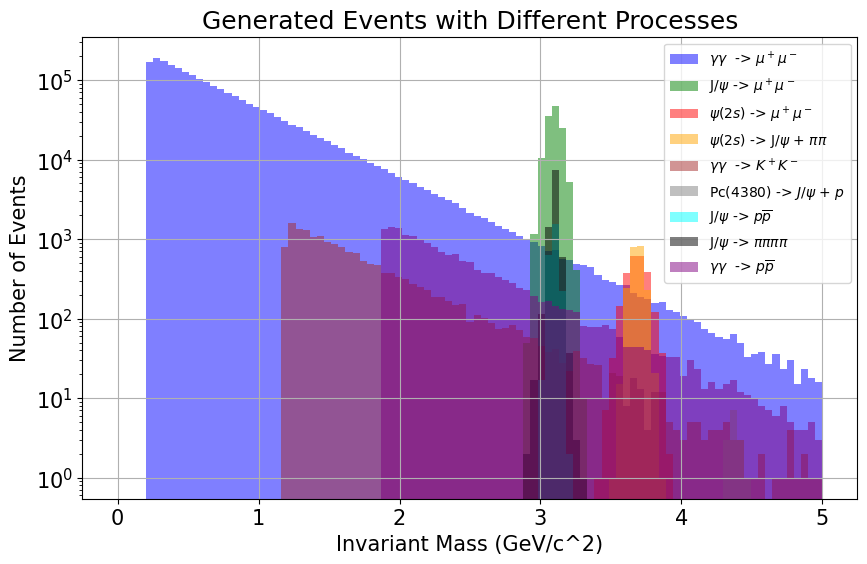

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Event generation parameters
n_photon_photon = 2144429
n_jpsi = 124800
n_psi2S_muons = 2320
n_psi2S_jpsi_pions = 2120
n_pq1 = 14
#n_pq2 = 25
n_pp_kaon = 16920
n_jpsi_protons = 2440
n_jpsi_4pi = 9470
#n_jpsi_3pi = 500
n_photon_photon_proton = 16693 #Run 2 numbers

# Constants (GeV/c^2)
m_muon = 0.105658  # Muon mass
m_jpsi = 3.0969    # J/psi mass
m_psi2S = 3.6861   # Psi(2S) mass
m_pion = 0.13957   # Charged pion mass
m_proton= .938 
m_pentaquark= 4.38
m_electron= .0005
n_pentaquark= 10000
m_kaon= 0.49367
m_rho = 0.775

def isotropic_two_body_decay(mother_mass, daughter_mass1, daughter_mass2):
    E1 = (mother_mass**2 + daughter_mass1**2 - daughter_mass2**2) / (2 * mother_mass)
    E2 = (mother_mass**2 + daughter_mass2**2 - daughter_mass1**2) / (2 * mother_mass)
    p = np.sqrt(E1**2 - daughter_mass1**2)
    p = tpc_momentum_resolution(p)
    theta = np.arccos(2 * np.random.rand() - 1)
    phi = 2 * np.pi * np.random.rand()
    p1 = np.array([p * np.sin(theta) * np.cos(phi), p * np.sin(theta) * np.sin(phi), p * np.cos(theta)])
    p2 = -p1
    return p1, p2, E1, E2

def tpc_momentum_resolution(momentum):
    a = 0.005
    b = 0.01
    resolution = np.sqrt(a**2 + (b * momentum)**2)
    smeared_momentum = momentum * (1 + np.random.normal(0, resolution))
    return smeared_momentum

def generate_photon_photon_events(n_events):
    masses = np.random.exponential(0.5, n_events) + 2 * m_muon  # Invariant mass distribution
    events = []
    for mass in masses:
        smearedTracks = []
        muon1_p, muon2_p, _, _ = isotropic_two_body_decay(mass, m_muon, m_muon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_jpsi_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        muon1_p, muon2_p, E1, E2 = isotropic_two_body_decay(m_jpsi, m_muon, m_muon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_psi2S_muons_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        muon1_p, muon2_p, _, _ = isotropic_two_body_decay(m_psi2S, m_muon, m_muon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_psi2S_jpsi_pions_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        jpsi_p, pion_p, jpsi_E, pion_E = isotropic_two_body_decay(m_psi2S, m_jpsi, 2 * m_pion)
        muon1_p, muon2_p, muon1_E, muon2_E = isotropic_two_body_decay(m_jpsi, m_muon, m_muon)
        # jpsi_p = tpc_momentum_resolution(np.linalg.norm(jpsi_p))
        # pion_p = tpc_momentum_resolution(np.linalg.norm(pion_p))
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        smearedTracks.append(pion_p)
        smearedTracks.append(pion_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_jpsi_protons_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        proton1_p, proton2_p, _, _ = isotropic_two_body_decay(m_jpsi, m_proton, m_proton)
        # proton1_p = tpc_momentum_resolution(np.linalg.norm(proton1_p))
        # proton2_p = tpc_momentum_resolution(np.linalg.norm(proton2_p))
        smearedTracks.append(proton1_p)
        smearedTracks.append(proton2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)
#generate_jpsi_protons_events(n_events)

def generate_pp_kaon_events(n_events):
    masses = np.random.exponential(0.5, n_events) + 2 * m_kaon + 0.2 # Invariant mass distribution
    events = []
    for mass in masses:
        smearedTracks = []
        pp_kaon1_p, pp_kaon2_p, _, _ = isotropic_two_body_decay(mass, m_kaon, m_kaon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(pp_kaon1_p)
        smearedTracks.append(pp_kaon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

#-----------New gamma + gamma -> proton + proton

def generate_photon_photon_proton_events(n_events):
    masses = np.random.exponential(0.5, n_events) + 2 * m_proton  # Invariant mass distribution
    events = []
    for mass in masses:
        smearedTracks = []
        proton1_p, proton2_p, _, _ = isotropic_two_body_decay(mass, m_proton, m_proton)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(proton1_p)
        smearedTracks.append(proton2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def isotropic_three_body_decay(mother_mass, daughter_mass1, daughter_mass2, daughter_mass3):
    """
    Simulates an isotropic three-body decay, distributing energy and momentum according to phase space constraints.
    Returns the momenta and energies of the three daughter particles.
    """
    # Total energy available for distribution after accounting for minimum required energy
    total_energy_available = (mother_mass - daughter_mass1 - daughter_mass2 - daughter_mass3)
    
    if total_energy_available <= 0:
        raise ValueError("Insufficient mass for a three-body decay.")

    # Randomly divide the available energy between the three daughters
    available_energy1 = np.random.uniform(0, total_energy_available)
    available_energy2 = np.random.uniform(0, total_energy_available - available_energy1)
    available_energy3 = total_energy_available - available_energy1 - available_energy2
    
    E1 = daughter_mass1 + available_energy1
    E2 = daughter_mass2 + available_energy2
    E3 = daughter_mass3 + available_energy3

    # Compute the momenta from the energies
    p1 = np.sqrt(E1**2 - daughter_mass1**2)
    p2 = np.sqrt(E2**2 - daughter_mass2**2)
    p3 = np.sqrt(E3**2 - daughter_mass3**2)
    
    # Random angles for isotropic decay
    theta1 = np.arccos(2 * np.random.rand() - 1)
    phi1 = 2 * np.pi * np.random.rand()
    
    theta2 = np.arccos(2 * np.random.rand() - 1)
    phi2 = 2 * np.pi * np.random.rand()
    
    # Calculate the momenta in 3D (isotropic decay)
    p1_vec = np.array([p1 * np.sin(theta1) * np.cos(phi1), p1 * np.sin(theta1) * np.sin(phi1), p1 * np.cos(theta1)])
    p2_vec = np.array([p2 * np.sin(theta2) * np.cos(phi2), p2 * np.sin(theta2) * np.sin(phi2), p2 * np.cos(theta2)])
    p3_vec = -p1_vec - p2_vec  # Momentum conservation
    
    return p1_vec, p2_vec, p3_vec, E1, E2, E3


def boost_to_lab_frame(momentum, boost_vector):
    """
    Boosts the momentum of a particle to the lab frame using the boost vector.
    """
    # Check if the boost vector is effectively zero (no boost needed)
    if np.linalg.norm(boost_vector) < 1e-10:
        print("error1")
        return momentum
    
    beta = boost_vector / np.linalg.norm(boost_vector)
    beta_norm_sq = np.linalg.norm(beta)**2
    
    # Ensure that beta_norm_sq < 1 (speed of light constraint)
    if beta_norm_sq >= 1.0:
        print("error2")
        return momentum  # No valid boost
    
    gamma = 1.0 / np.sqrt(1 - beta_norm_sq)
    dot_product = np.dot(momentum, beta)
    energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
    
    boosted_energy = gamma * (energy + dot_product)
    boosted_momentum = momentum + (gamma - 1) * dot_product / beta_norm_sq * beta + gamma * energy * beta
    
    return boosted_momentum

def boost_along_axis(momentum, beta, axis):
    """
    Boosts a particle along a single axis.
    
    Parameters:
    - momentum: 3D momentum vector of the particle to be boosted
    - beta: velocity (as a fraction of the speed of light) along the chosen axis
    - axis: axis along which to boost ('x', 'y', or 'z')
    
    Returns:
    - boosted_momentum: the 3D momentum vector after the boost along the given axis
    """
    if abs(beta) >= 1:
        print("error2")
        raise ValueError("Beta must be less than 1 for a valid boost.")
    
    gamma = 1.0 / np.sqrt(1 - beta**2)
    
    # Boost along the x-axis
    if axis == 'x':
        energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
        boosted_px = gamma * (momentum[0] + beta * energy)
        boosted_energy = gamma * (energy + beta * momentum[0])
        boosted_momentum = np.array([boosted_px, momentum[1], momentum[2]])
    
    # Boost along the y-axis
    elif axis == 'y':
        energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
        boosted_py = gamma * (momentum[1] + beta * energy)
        boosted_energy = gamma * (energy + beta * momentum[1])
        boosted_momentum = np.array([momentum[0], boosted_py, momentum[2]])
    
    # Boost along the z-axis
    elif axis == 'z':
        energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
        boosted_pz = gamma * (momentum[2] + beta * energy)
        boosted_energy = gamma * (energy + beta * momentum[2])
        boosted_momentum = np.array([momentum[0], momentum[1], boosted_pz])
    
    else:
        raise ValueError("Axis must be 'x', 'y', or 'z'.")
    
    return boosted_momentum, boosted_energy

def boost_to_lab_frame_separate(momentum, boost_vector):
    """
    Boosts the particle's 3D momentum vector using separate boosts along the x, y, and z axes.
    
    Parameters:
    - momentum: 3D momentum vector of the particle
    - boost_vector: 3D velocity vector (as a fraction of the speed of light)
    
    Returns:
    - boosted_momentum: the 3D momentum vector after boosting along x, y, and z
    """
    boosted_momentum = momentum
    # Boost along x
    boosted_momentum, _ = boost_along_axis(boosted_momentum, boost_vector[0], 'x')
    # Boost along y
    boosted_momentum, _ = boost_along_axis(boosted_momentum, boost_vector[1], 'y')
    # Boost along z
    boosted_momentum, _ = boost_along_axis(boosted_momentum, boost_vector[2], 'z')
    
    px, py, pz = boosted_momentum
    p_total = np.sqrt(px**2 + py**2 + pz**2)
    
    # Calculate new theta (polar angle)
    theta_prime = np.arccos(pz / p_total) if p_total > 0 else 0.0
    
    # Calculate new phi (azimuthal angle)
    phi_prime = np.arctan2(py, px)

    return boosted_momentum, theta_prime, phi_prime


def generate_psi2S_jpsi_pions_events_fixed(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi
        muon1_p_rest, muon2_p_rest, _, _ = isotropic_two_body_decay(m_jpsi, m_muon, m_muon)
        
        # Boost the muons back to the lab frame using the momentum of the J/psi from Step 1
        muon1_p_lab = boost_to_lab_frame(muon1_p_rest, jpsi_p)
        muon2_p_lab = boost_to_lab_frame(muon2_p_rest, jpsi_p)
        
        smearedTracks.append(muon1_p_lab)
        smearedTracks.append(muon2_p_lab)
        smearedTracks.append(pion1_p)
        smearedTracks.append(pion2_p)
        events.append(smearedTracks)
    
    return np.array(events)

def isotropic_two_body_decay_no_smearing(mother_mass, daughter_mass1, daughter_mass2):
    """
    Isotropic two-body decay without smearing.
    """
    E1 = (mother_mass**2 + daughter_mass1**2 - daughter_mass2**2) / (2 * mother_mass)
    E2 = (mother_mass**2 + daughter_mass2**2 - daughter_mass1**2) / (2 * mother_mass)
    p = np.sqrt(E1**2 - daughter_mass1**2)
    
    theta = np.arccos(2 * np.random.rand() - 1)
    phi = 2 * np.pi * np.random.rand()
    p1 = np.array([p * np.sin(theta) * np.cos(phi), p * np.sin(theta) * np.sin(phi), p * np.cos(theta)])
    p2 = -p1
    return p1, p2, E1, E2

def tpc_momentum_resolution_3d(momentum_vec):
    """
    Applies TPC momentum resolution smearing to each component of the momentum vector.
    """
    smeared_momentum_vec = np.zeros(3)
    for i in range(3):
        momentum = momentum_vec[i]
        a = 0.005
        b = 0.01
        resolution = np.sqrt(a**2 + (b * momentum)**2)
        smeared_momentum_vec[i] = momentum * (1 + np.random.normal(0, resolution))
    return smeared_momentum_vec

def generate_psi2S_jpsi_pions_events_smearing_after_boost(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (without smearing)
        muon1_p_rest, muon2_p_rest, _, _ = isotropic_two_body_decay_no_smearing(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        muon1_p_lab = boost_to_lab_frame(muon1_p_rest, jpsi_p)
        muon2_p_lab = boost_to_lab_frame(muon2_p_rest, jpsi_p)
        
        # Step 4: Apply smearing to the muons after boosting to the lab frame (component-wise)
        muon1_p_lab_smeared = tpc_momentum_resolution_3d(muon1_p_lab)
        muon2_p_lab_smeared = tpc_momentum_resolution_3d(muon2_p_lab)
        
        # Append the smeared muons and pions to the event
        smearedTracks.append(muon1_p_lab_smeared)
        smearedTracks.append(muon2_p_lab_smeared)
        smearedTracks.append(pion1_p)
        smearedTracks.append(pion2_p)
        events.append(smearedTracks)
    
    return np.array(events)

# def plot_event_distribution(events_photon_photon, events_jpsi, events_psi2S_muons, events_psi2S_jpsi_pions, events_jpsi_protons, events_pp_kaons, events_pq):
#     plt.figure(figsize=(10, 6))
#     bins = np.linspace(0, 5, 100)
#     plt.hist(events_photon_photon, bins, alpha=0.5, label='Photon+Photon -> 2 muons', color='blue')
#     plt.hist(events_jpsi, bins, alpha=0.5, label='J/psi -> 2 muons', color='green')
#     plt.hist(events_psi2S_muons, bins, alpha=0.5, label='psi(2S) -> 2 muons', color='red')
#     plt.hist(events_psi2S_jpsi_pions, bins, alpha=0.5, label='psi(2S) -> J/psi + 2 pions', color='orange')
#     plt.hist(events_jpsi_protons, bins, alpha=0.5, label='J/psi -> 2 protons', color='cyan')
#     plt.hist(events_pp_kaons, bins, alpha=0.5, label='Photon+Photon -> 2 kaons', color='brown')
#     plt.hist(events_pq, bins, alpha=0.5, label='pentaquark(2S) -> J/psi + 1 proton', color='gray')
#     plt.xlabel('Invariant Mass (GeV/c^2)')
#     plt.yscale('log')  # Log scale for y-axis
#     plt.ylabel('Number of Events')
#     plt.title('Generated Events with Different Processes')
#     plt.legend(loc='upper right')
#     plt.grid(True)
#     plt.show()

def plot_event_distribution(events_photon_photon, events_jpsi, events_psi2S_muons, events_psi2S_jpsi_pions, events_jpsi_protons, events_pp_kaons, events_pq, events_jpsi_4pions, events_photon_photon_proton):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 100)
    plt.hist(events_photon_photon, bins, alpha=0.5, label=r'$\gamma \gamma$  -> $\mu^+ \mu^-$', color='blue')
    plt.hist(events_jpsi, bins, alpha=0.5, label=r'J/$\psi$ -> $\mu^+ \mu^-$', color='green')
    plt.hist(events_psi2S_muons, bins, alpha=0.5, label=r'$\psi(2s)$ -> $\mu^+ \mu^-$', color='red')
    plt.hist(events_psi2S_jpsi_pions, bins, alpha=0.5, label=r'$\psi(2s)$ -> J/$\psi$ + $\pi \pi$', color='orange')
    plt.hist(events_pp_kaons, bins, alpha=0.5, label=r'$\gamma \gamma$  -> $K^+ K^-$', color='brown')
    plt.hist(events_pq, bins, alpha=0.5, label=r'Pc(4380) -> $J/ \psi$ + $p$', color='gray')
    plt.hist(events_jpsi_protons, bins, alpha=0.5, label=r'J/$\psi$ -> $p \overline{p}$', color='cyan')
    plt.hist(events_jpsi_4pions, bins, alpha=0.5, label=r'J/$\psi$ -> $\pi \pi \pi \pi$', color='black')
    plt.hist(events_photon_photon_proton, bins, alpha=0.5, label=r'$\gamma \gamma$  -> $p \overline{p}$', color='purple')

    #plt.hist(events_jpsi_rho, bins, alpha=0.5, label='J/psi -> 2 rho', color='purple')
    #plt.hist(events_jpsi_3pions, bins, alpha=0.5, label='J/psi -> 3 pions', color='pink')
    plt.xlabel('Invariant Mass (GeV/c^2)')
    plt.yscale('log')  # Log scale for y-axis
    plt.ylabel('Number of Events')
    plt.title('Generated Events with Different Processes')
    plt.legend(loc='upper right', fontsize = 10)
    plt.grid(True)
    plt.show()


#plt.rcParams.update({'font.size': 15})

def plot_event_distribution1(events_jpsi_4pions):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 100)
    plt.hist(events_jpsi_4pions, bins, alpha=0.5, label='J/psi -> 4 pions', color='black')
    plt.xlabel('Invariant Mass (GeV/c^2)')
    plt.yscale('log')  # Log scale for y-axis
    plt.ylabel('Number of Events')
    plt.title('Generated Events with Different Processes')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


def compute_invariant_mass(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_muon  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_kaon(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_kaon  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_jpsi_proton(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_proton  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_masses_for_events_jpsi_proton(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_jpsi_proton(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_kaon(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_kaon(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events(events):
    """
    Computes the invariant mass for a list of events, where each event contains a list of tracks.
    
    Parameters:
    - events: A list of events, where each event is a list of tracks.
              Each track is a dictionary containing:
              - 'momentum': a numpy array representing the 3-momentum of the track
              - 'mass': the mass of the particle
    
    Returns:
    - invariant_masses: A list of invariant masses, one for each event.
    """
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def isotropic_two_body_decay_with_angles(mother_mass, daughter_mass1, daughter_mass2):
    """
    Isotropic two-body decay with angle saving (theta, phi).
    Returns momenta, energies, and angles.
    """
    E1 = (mother_mass**2 + daughter_mass1**2 - daughter_mass2**2) / (2 * mother_mass)
    E2 = (mother_mass**2 + daughter_mass2**2 - daughter_mass1**2) / (2 * mother_mass)
    p = np.sqrt(E1**2 - daughter_mass1**2)
    
    theta = np.arccos(2 * np.random.rand() - 1)
    phi = 2 * np.pi * np.random.rand()
    p1 = np.array([p * np.sin(theta) * np.cos(phi), p * np.sin(theta) * np.sin(phi), p * np.cos(theta)])
    p2 = -p1
    
    return p1, p2, E1, E2, theta, phi

def reconstruct_3d_momentum(smeared_p, theta, phi):
    """
    Reconstructs the 3D momentum components using the smeared momentum magnitude and saved angles (theta, phi).
    """
    px = smeared_p * np.sin(theta) * np.cos(phi)
    py = smeared_p * np.sin(theta) * np.sin(phi)
    pz = smeared_p * np.cos(theta)
    
    return np.array([px, py, pz])

def calculate_boost_vector(momentum, energy):
    """
    Calculates the velocity (beta) from the momentum and energy to be used as the boost vector.
    
    Parameters:
    - momentum: 3D momentum vector of the particle
    - energy: total energy of the particle
    
    Returns:
    - beta: 3D velocity vector (beta = p / E)
    """
    beta = momentum / energy
    return beta

def generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        boost_vector = calculate_boost_vector(jpsi_p, jpsi_E)

        muon1_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(muon1_p_rest, boost_vector)
        muon2_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(muon2_p_rest, boost_vector)
        
        # Step 4: Apply smearing to the momentum magnitudes only (not components yet)
        smeared_muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p_lab))
        smeared_muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p_lab))

        
        # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
        muon1_p_lab_smeared = reconstruct_3d_momentum(smeared_muon1_p, theta_prime, phi_prime) #<- correct
        muon2_p_lab_smeared = reconstruct_3d_momentum(smeared_muon2_p, theta_second, phi_second) #<- correct
        
        # Append the smeared muons and pions to the event
        smearedTracks.append(muon1_p_lab_smeared)
        smearedTracks.append(muon2_p_lab_smeared)
        smearedTracks.append(pion1_p)
        smearedTracks.append(pion2_p)
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon1_p)**2 + m_muon*m_muon))
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon2_p)**2 + m_muon*m_muon))
        smearedTracks.append(pion1_E)
        smearedTracks.append(pion2_E)

        # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events
    # return np.array(events)


def generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, proton_p, jpsi_E, proton_E = isotropic_two_body_decay(m_pentaquark, m_jpsi, m_proton)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        boost_vector = calculate_boost_vector(jpsi_p, jpsi_E)

        muon1_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(muon1_p_rest, boost_vector)
        muon2_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(muon2_p_rest, boost_vector)
        
        # Step 4: Apply smearing to the momentum magnitudes only (not components yet)
        smeared_muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p_lab))
        smeared_muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p_lab))

        # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
        muon1_p_lab_smeared = reconstruct_3d_momentum(smeared_muon1_p, theta_prime, phi_prime) #<- correct
        muon2_p_lab_smeared = reconstruct_3d_momentum(smeared_muon2_p, theta_second, phi_second) #<- correct
        
        # Append the smeared muons and pions to the event
        smearedTracks.append(muon1_p_lab_smeared)
        smearedTracks.append(muon2_p_lab_smeared)
        smearedTracks.append(proton_p)
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon1_p)**2 + m_muon*m_muon))
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon2_p)**2 + m_muon*m_muon))
        smearedTracks.append(proton_E)

        # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events
#generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_pentaquark)

# def generate_jpsi_four_pions(n_events):
#     events = []
#     for _ in range(n_events):
#         smearedTracks = []
        
#         # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
#         jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_jpsi, m_rho, m_pion, m_pion)
        
#         # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
#         pion3_p_rest, pion4_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
#         # Step 3: Boost the muons to the lab frame
#         boost_vector = calculate_boost_vector(jpsi_p, jpsi_E)

#         pion3_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(pion3_p_rest, boost_vector)
#         pion4_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(pion4_p_rest, boost_vector)
        
#         # Step 4: Apply smearing to the momentum magnitudes only (not components yet)
#         smeared_pion3_p = tpc_momentum_resolution(np.linalg.norm(pion3_p_lab))
#         smeared_pion4_p = tpc_momentum_resolution(np.linalg.norm(pion4_p_lab))

        
#         # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
#         smeared_pion3_p_lab = reconstruct_3d_momentum(smeared_pion3_p, theta_prime, phi_prime) #<- correct
#         smeared_pion4_p_lab = reconstruct_3d_momentum(smeared_pion4_p, theta_second, phi_second) #<- correct
        
#         # Append the smeared muons and pions to the event
#         smearedTracks.append(smeared_pion3_p_lab)
#         smearedTracks.append(smeared_pion4_p_lab)
#         smearedTracks.append(pion1_p)
#         smearedTracks.append(pion2_p)
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion3_p_lab)**2 + m_pion*m_pion))
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion4_p_lab)**2 + m_pion*m_pion))
#         smearedTracks.append(pion1_E)
#         smearedTracks.append(pion2_E)

#         # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
#         events.append(smearedTracks)
    
#     return events

def lorentz_boost(p_vec, mass, beta):
    """
    Boosts a particle's 4-vector from its rest frame to the lab frame using a Lorentz transformation.
    
    Parameters:
      p_vec: 3D numpy array of the particle's momentum in the rest frame.
      mass: Mass of the particle.
      beta: 3D numpy array representing the boost velocity vector (v/c). Its norm must be less than 1.
    
    Returns:
      E_prime: Boosted energy.
      p_prime: Boosted 3-momentum (numpy array).
    """
    beta2 = np.dot(beta, beta)
    if beta2 >= 1:
        raise ValueError("Beta must be less than 1.")
    gamma = 1.0 / np.sqrt(1 - beta2)
    # Energy in the particle's rest frame (before boost)
    E = np.sqrt(np.linalg.norm(p_vec)**2 + mass**2)
    p_dot_beta = np.dot(p_vec, beta)
    # Lorentz transformation for the time component
    E_prime = gamma * (E + p_dot_beta)
    # Lorentz transformation for the spatial part
    p_prime = p_vec + ((gamma - 1) * p_dot_beta / beta2 + gamma * E) * beta
    return E_prime, p_prime

def generate_jpsi_four_pions(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: J/ψ decays to ρ + 2 pions (three-body decay)
        # Here, the first daughter is interpreted as the ρ.
        # The decay returns: [rho momentum, pion1 momentum, pion2 momentum, rho energy, pion1 energy, pion2 energy]
        rho_p, pion1_p, pion2_p, rho_E, pion1_E, pion2_E = isotropic_three_body_decay(m_jpsi, m_rho, m_pion, m_pion)
        
        # Step 2: ρ decays to two pions in its rest frame (with angles saved).
        # Here, we generate the two pions from the ρ decay in the ρ rest frame.
        pion3_p_rest, pion4_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
        # Step 3: Compute the boost vector for the ρ.
        # Use the ρ's lab momentum and energy to get the velocity: beta = p/E.
        beta = rho_p / rho_E
        
        # Step 4: Boost the ρ decay products using the new Lorentz boost function.
        # This will naturally accelerate one pion (if its momentum is aligned with beta)
        # and decelerate the other (if anti-aligned).
        E3_lab, pion3_p_lab = lorentz_boost(pion3_p_rest, m_pion, beta)
        E4_lab, pion4_p_lab = lorentz_boost(pion4_p_rest, m_pion, beta)
        
        # Step 5: Optionally apply momentum smearing (if desired) to the boosted momenta.
        # Here we smear only the magnitude and then reconstruct the 3D vector with the same direction.
        p3_lab_mag = np.linalg.norm(pion3_p_lab)
        p4_lab_mag = np.linalg.norm(pion4_p_lab)
        smeared_p3_mag = tpc_momentum_resolution(p3_lab_mag)
        smeared_p4_mag = tpc_momentum_resolution(p4_lab_mag)
        
        # Obtain the angles from the boosted momentum
        theta3 = np.arccos(pion3_p_lab[2] / p3_lab_mag) if p3_lab_mag > 0 else 0.0
        phi3 = np.arctan2(pion3_p_lab[1], pion3_p_lab[0])
        theta4 = np.arccos(pion4_p_lab[2] / p4_lab_mag) if p4_lab_mag > 0 else 0.0
        phi4 = np.arctan2(pion4_p_lab[1], pion4_p_lab[0])
        
        # Reconstruct the smeared momentum vectors with the same directions.
        smeared_pion3_p_lab = reconstruct_3d_momentum(smeared_p3_mag, theta3, phi3)
        smeared_pion4_p_lab = reconstruct_3d_momentum(smeared_p4_mag, theta4, phi4)
        
        # Recalculate energies for the smeared momenta (using pion mass)
        E3_smeared = np.sqrt(np.linalg.norm(smeared_pion3_p_lab)**2 + m_pion**2)
        E4_smeared = np.sqrt(np.linalg.norm(smeared_pion4_p_lab)**2 + m_pion**2)
        
        # Step 6: Construct the final event.
        # Final state: the two pions from the ρ decay (smeared) and the two pions directly from the three-body decay.
        # Also, keep the energy values for invariant mass reconstruction.
        # The event list is organized as: [pion3_lab (smeared), pion4_lab (smeared), pion1 (from three-body), pion2 (from three-body),
        #                                 E3_smeared, E4_smeared, pion1_E, pion2_E]
        smearedTracks.extend([smeared_pion3_p_lab, smeared_pion4_p_lab, pion1_p, pion2_p,
                              E3_smeared, E4_smeared, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events

def generate_psi2S_jpsi_pions_events_new(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        beta = jpsi_p / jpsi_E

        E1_lab, muon1_p_lab = lorentz_boost(muon1_p_rest, m_muon, beta)
        E2_lab, muon2_p_lab = lorentz_boost(muon2_p_rest, m_muon, beta)

        p1_lab_mag = np.linalg.norm(muon1_p_lab)
        p2_lab_mag = np.linalg.norm(muon2_p_lab)
        smeared_p1_mag = tpc_momentum_resolution(p1_lab_mag)
        smeared_p2_mag = tpc_momentum_resolution(p2_lab_mag)

        theta1 = np.arccos(muon1_p_lab[2] / p1_lab_mag) if p1_lab_mag > 0 else 0.0
        phi1 = np.arctan2(muon1_p_lab[1], muon1_p_lab[0])
        theta2 = np.arccos(muon2_p_lab[2] / p2_lab_mag) if p2_lab_mag > 0 else 0.0
        phi2 = np.arctan2(muon2_p_lab[1], muon2_p_lab[0])

        smeared_muon1_p_lab = reconstruct_3d_momentum(smeared_p1_mag, theta1, phi1)
        smeared_muon2_p_lab = reconstruct_3d_momentum(smeared_p2_mag, theta2, phi2)

        E1_smeared = np.sqrt(np.linalg.norm(smeared_muon1_p_lab)**2 + m_muon**2)
        E2_smeared = np.sqrt(np.linalg.norm(smeared_muon2_p_lab)**2 + m_muon**2)

        smearedTracks.extend([smeared_muon1_p_lab, smeared_muon2_p_lab, pion1_p, pion2_p,
                              E1_smeared, E2_smeared, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events


def generate_pentaquark_events_new(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, proton_p, jpsi_E, proton_E = isotropic_two_body_decay(m_pentaquark, m_jpsi, m_proton)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        beta = jpsi_p / jpsi_E

        E1_lab, muon1_p_lab = lorentz_boost(muon1_p_rest, m_muon, beta)
        E2_lab, muon2_p_lab = lorentz_boost(muon2_p_rest, m_muon, beta)

        p1_lab_mag = np.linalg.norm(muon1_p_lab)
        p2_lab_mag = np.linalg.norm(muon2_p_lab)
        smeared_p1_mag = tpc_momentum_resolution(p1_lab_mag)
        smeared_p2_mag = tpc_momentum_resolution(p2_lab_mag)

        theta1 = np.arccos(muon1_p_lab[2] / p1_lab_mag) if p1_lab_mag > 0 else 0.0
        phi1 = np.arctan2(muon1_p_lab[1], muon1_p_lab[0])
        theta2 = np.arccos(muon2_p_lab[2] / p2_lab_mag) if p2_lab_mag > 0 else 0.0
        phi2 = np.arctan2(muon2_p_lab[1], muon2_p_lab[0])

        smeared_muon1_p_lab = reconstruct_3d_momentum(smeared_p1_mag, theta1, phi1)
        smeared_muon2_p_lab = reconstruct_3d_momentum(smeared_p2_mag, theta2, phi2)

        E1_smeared = np.sqrt(np.linalg.norm(smeared_muon1_p_lab)**2 + m_muon**2)
        E2_smeared = np.sqrt(np.linalg.norm(smeared_muon2_p_lab)**2 + m_muon**2)

        smearedTracks.extend([smeared_muon1_p_lab, smeared_muon2_p_lab, proton_p,
                              E1_smeared, E2_smeared, proton_E])
        events.append(smearedTracks)
    
    return events


# def generate_jpsi_3pions_events(n_events):
#     events = []
#     for _ in range(n_events):
#         smearedTracks = []
        
#         # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
#         rho_p, pion1_p, rho_E, pion1_E = isotropic_two_body_decay(m_jpsi, m_rho, m_pion)
        
#         # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
#         pion2_p_rest, pion3_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
#         # Step 3: Boost the muons to the lab frame
#         boost_vector = calculate_boost_vector(rho_p, rho_E)

#         pion2_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(pion2_p_rest, boost_vector)
#         pion3_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(pion3_p_rest, boost_vector)
        
#         smeared_pion2_p = tpc_momentum_resolution(np.linalg.norm(pion2_p_lab))
#         smeared_pion3_p = tpc_momentum_resolution(np.linalg.norm(pion3_p_lab))

#         # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
#         pion2_p_lab_smeared = reconstruct_3d_momentum(smeared_pion2_p, theta_prime, phi_prime) #<- correct
#         pion3_p_lab_smeared = reconstruct_3d_momentum(smeared_pion3_p, theta_second, phi_second) #<- correct
        
#         # Append the smeared muons and pions to the event
#         smearedTracks.append(pion2_p_lab_smeared)
#         smearedTracks.append(pion3_p_lab_smeared)
#         smearedTracks.append(pion1_p)
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion2_p)**2 + m_pion*m_pion))
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion3_p)**2 + m_pion*m_pion))
#         smearedTracks.append(pion1_E)

#         # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
#         events.append(smearedTracks)

#     return events

def generate_jpsi_3pions_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: J/ψ -> ρ + π (two-body decay)
        # The first daughter is the ρ, the second is the "direct" pion.
        rho_p, pion_direct_p, rho_E, pion_direct_E = isotropic_two_body_decay(m_jpsi, m_rho, m_pion)
        
        # Step 2: ρ -> π + π in the ρ rest frame (with angles saved)
        pion1_p_rest, pion2_p_rest, _, _, theta, phi = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
        # Step 3: Compute the boost for the ρ decay products using the ρ's four-momentum.
        # (Beta = p/E for the ρ.)
        beta = rho_p / rho_E
        
        # Use our dedicated Lorentz boost function to boost each pion from the ρ rest frame to the lab frame.
        E1_lab, pion1_p_lab = lorentz_boost(pion1_p_rest, m_pion, beta)
        E2_lab, pion2_p_lab = lorentz_boost(pion2_p_rest, m_pion, beta)
        
        # Step 4: (Optional) Apply momentum smearing to the boosted momenta.
        p1_lab_mag = np.linalg.norm(pion1_p_lab)
        p2_lab_mag = np.linalg.norm(pion2_p_lab)
        smeared_p1_mag = tpc_momentum_resolution(p1_lab_mag)
        smeared_p2_mag = tpc_momentum_resolution(p2_lab_mag)
        
        # Extract the original directions from the boosted momenta.
        theta1 = np.arccos(pion1_p_lab[2] / p1_lab_mag) if p1_lab_mag > 0 else 0.0
        phi1 = np.arctan2(pion1_p_lab[1], pion1_p_lab[0])
        theta2 = np.arccos(pion2_p_lab[2] / p2_lab_mag) if p2_lab_mag > 0 else 0.0
        phi2 = np.arctan2(pion2_p_lab[1], pion2_p_lab[0])
        
        # Reconstruct the smeared momentum vectors.
        smeared_pion1_lab = reconstruct_3d_momentum(smeared_p1_mag, theta1, phi1)
        smeared_pion2_lab = reconstruct_3d_momentum(smeared_p2_mag, theta2, phi2)
        
        # Recalculate the energies for these pions.
        E1_smeared = np.sqrt(np.linalg.norm(smeared_pion1_lab)**2 + m_pion**2)
        E2_smeared = np.sqrt(np.linalg.norm(smeared_pion2_lab)**2 + m_pion**2)
        
        # Step 5: Process the direct pion.
        # Optionally, you can smear its momentum as well.
        p_direct = np.linalg.norm(pion_direct_p)
        smeared_direct = tpc_momentum_resolution(p_direct)
        theta_direct = np.arccos(pion_direct_p[2] / p_direct) if p_direct > 0 else 0.0
        phi_direct = np.arctan2(pion_direct_p[1], pion_direct_p[0])
        smeared_pion_direct = reconstruct_3d_momentum(smeared_direct, theta_direct, phi_direct)
        E_direct_smeared = np.sqrt(np.linalg.norm(smeared_pion_direct)**2 + m_pion**2)
        
        # Final event: three pions with their four-vector information.
        # Here we store a tuple: ([p1, p2, p_direct], [E1, E2, E_direct])
        # event["momenta"] = [smeared_pion1_lab, smeared_pion2_lab, smeared_pion_direct]
        # event["energies"] = [E1_smeared, E2_smeared, E_direct_smeared]
        smearedTracks.extend([smeared_pion1_lab, smeared_pion2_lab, smeared_pion_direct, E1_smeared, E2_smeared, E_direct_smeared])
        events.append(smearedTracks)

        # events.append(event)
    
    return events

# def compute_invariant_mass_jpsi_3pi(event):
#     # event contains:
#     #   event["momenta"]: list of 3 numpy arrays for 3-momenta
#     #   event["energies"]: list of corresponding energies.
#     total_E = sum(event["energies"])
#     total_p = event["momenta"][0] + event["momenta"][1] + event["momenta"][2]
#     inv_mass_sq = total_E**2 - np.linalg.norm(total_p)**2
#     if inv_mass_sq > 0:
#         return np.sqrt(inv_mass_sq)
#     else:
#         print("errorInv in 3pi")
#         return np.nan


def compute_invariant_mass_psi2s_2(all):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E  = all
    total_energy = m1_E + m2_E + p1_E + p2_E
    total_momentum = muon1_p_lab_smeared + muon2_p_lab_smeared + pion1_p + pion2_p
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_pq_2(all):
    muon1_p_lab_smeared, muon2_p_lab_smeared, proton_p, m1_E, m2_E, p_E,  = all
    total_energy = m1_E + m2_E + p_E 
    total_momentum = muon1_p_lab_smeared + muon2_p_lab_smeared + proton_p 
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_jpsi_4pi(all):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, pion4_p, p1_E, p2_E, p3_E, p4_E  = all
    total_energy = p1_E + p2_E + p3_E + p4_E 
    total_momentum = pion1_p_lab_smeared + pion2_p_lab_smeared + pion3_p + pion4_p 
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_jpsi_3pi(all):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, p1_E, p2_E, p3_E  = all
    total_energy = p1_E + p2_E + p3_E  
    total_momentum = pion1_p_lab_smeared + pion2_p_lab_smeared + pion3_p  
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass


def compute_invariant_masses_for_events_psi2s(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_psi2s_2(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_pq(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_pq_2(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_jpsi_3pi(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_jpsi_3pi(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_jpsi_4pi(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_jpsi_4pi(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses



# Steering function for generating events
def generate_all_events():
    events_photon_photon = generate_photon_photon_events(n_photon_photon)
    events_jpsi = generate_jpsi_events(n_jpsi)
    events_psi2S_muons = generate_psi2S_muons_events(n_psi2S_muons)
    events_psi2S_jpsi_pions = generate_psi2S_jpsi_pions_events_new(n_psi2S_jpsi_pions)
    events_pp_kaons = generate_pp_kaon_events(n_pp_kaon)
    events_jpsi_protons = generate_jpsi_protons_events(n_jpsi_protons)
    events_pq = generate_pentaquark_events_new(n_pq1)
    events_jpsi_4pions = generate_jpsi_four_pions(n_jpsi_4pi)
    events_photon_photon_proton = generate_photon_photon_proton_events(n_photon_photon_proton)
    # events_jpsi_rho = generate_jpsi_rho_events(n_jpsi_4pi)
    #events_jpsi_3pions = generate_jpsi_3pions_events(n_jpsi_3pi)

    photon_photon = compute_invariant_masses_for_events(events_photon_photon)
    jpsi          = compute_invariant_masses_for_events(events_jpsi)
    psi2s_muons   = compute_invariant_masses_for_events(events_psi2S_muons)
    psi2s_jpsi_pi = compute_invariant_masses_for_events_psi2s(events_psi2S_jpsi_pions)
    pp_kaons      = compute_invariant_masses_for_events_kaon(events_pp_kaons)
    jpsi_protons  = compute_invariant_masses_for_events_jpsi_proton(events_jpsi_protons)
    pentaquark    = compute_invariant_masses_for_events_pq(events_pq)
    jpsi_4pi      = compute_invariant_masses_for_events_jpsi_4pi(events_jpsi_4pions)
    photon_photon_proton = compute_invariant_masses_for_events_jpsi_proton(events_photon_photon_proton)

    #jpsi_rho      = compute_invariant_masses_for_events_jpsi_rho(events_jpsi_rho)
    #jpsi_3pi      = compute_invariant_masses_for_events_jpsi_3pi(events_jpsi_3pions)


    plot_event_distribution(photon_photon, jpsi, psi2s_muons, psi2s_jpsi_pi, jpsi_protons, pp_kaons, pentaquark, jpsi_4pi, photon_photon_proton)
    #plot_event_distribution1(jpsi_4pi)

# Run the generation and plotting
generate_all_events()



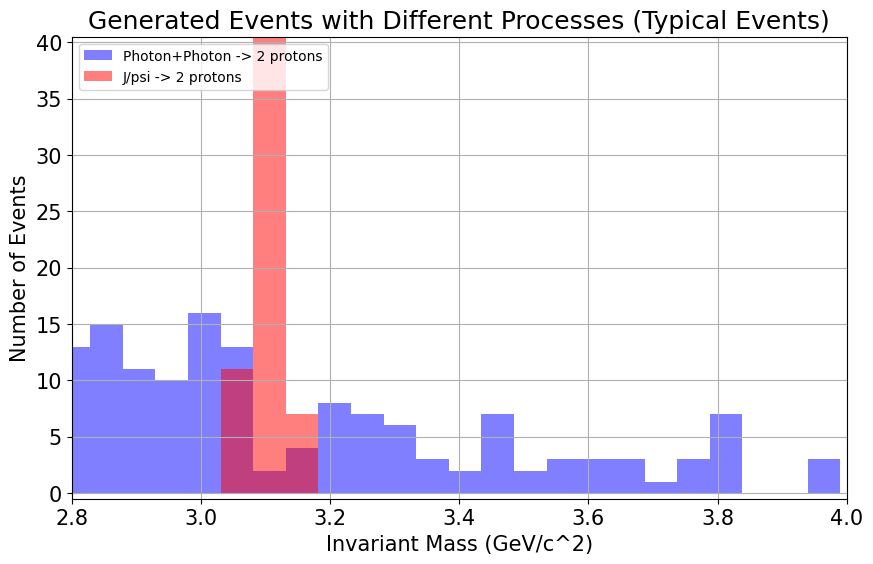

In [ ]:
def plot_event_distribution_proton(events_photon_photon_proton, events_jpsi_protons):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 60)
    plt.hist(events_photon_photon_proton, bins, alpha=0.5, label='Photon+Photon -> 2 protons', color='blue')
    plt.hist(events_jpsi_protons, bins, alpha=0.5, label='J/psi -> 2 protons', color='red')
    plt.xlabel('Invariant Mass (GeV/c^2)')
    #plt.yscale('log')  # Log scale for y-axis
    plt.xlim(2.8,4)
    plt.ylabel('Number of Events')
    plt.ylim(-0.5,40.5)
    plt.title('Generated Events with Different Processes (Typical Events)')
    plt.legend(loc='upper left', fontsize = 10)
    plt.grid(True)
    plt.show()

#plt.rcParams.update({'font.size': 15})

def generate_all_events_proton():
    events_photon_photon_proton = generate_photon_photon_proton_events(1000)
    events_jpsi_protons = generate_jpsi_protons_events(61)
    

    photon_photon_proton = compute_invariant_masses_for_events_jpsi_proton(events_photon_photon_proton)
    jpsi_protons  = compute_invariant_masses_for_events_jpsi_proton(events_jpsi_protons)
    
    plot_event_distribution_proton(photon_photon_proton, jpsi_protons)
    #plot_event_distribution1(jpsi_4pi)

# Run the generation and plotting
generate_all_events_proton()

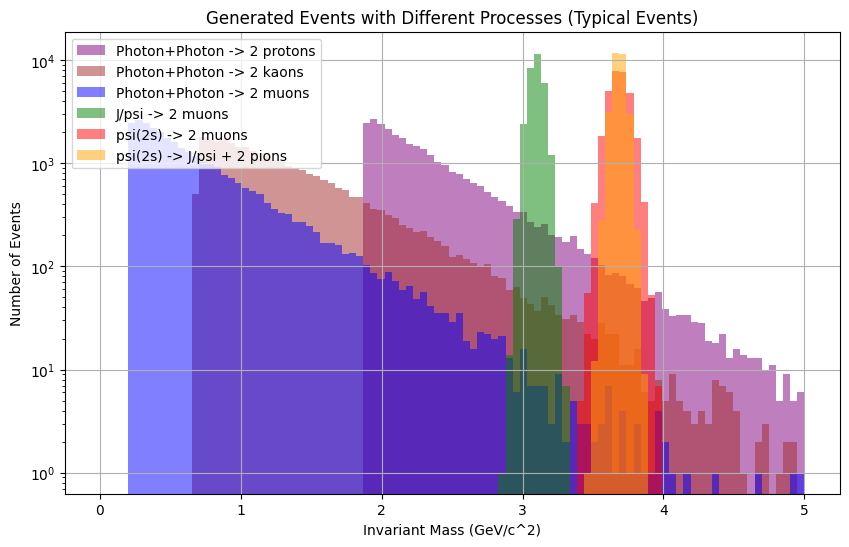

In [4]:

def plot_event_distribution_training(events_photon_photon_proton, events_pp_kaons, events_photon_photon, events_jpsi, events_psi2S_muons, events_psi2S_jpsi_pions):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 100)
    plt.hist(events_photon_photon_proton, bins, alpha=0.5, label='Photon+Photon -> 2 protons', color='purple')
    plt.hist(events_pp_kaons, bins, alpha=0.5, label='Photon+Photon -> 2 kaons', color='brown')
    plt.hist(events_photon_photon, bins, alpha=0.5, label='Photon+Photon -> 2 muons', color='blue')
    plt.hist(events_jpsi, bins, alpha=0.5, label='J/psi -> 2 muons', color='green')
    plt.hist(events_psi2S_muons, bins, alpha=0.5, label='psi(2s) -> 2 muons', color='red')
    plt.hist(events_psi2S_jpsi_pions, bins, alpha=0.5, label='psi(2s) -> J/psi + 2 pions', color='orange')
    
    plt.xlabel('Invariant Mass (GeV/c^2)')
    plt.yscale('log')  # Log scale for y-axis
    plt.ylabel('Number of Events')
    plt.title('Generated Events with Different Processes (Typical Events)')
    plt.legend(loc='upper left', fontsize = 10)
    plt.grid(True)
    plt.show()

plt.rcParams.update({'font.size': 10})

def generate_all_events_training():
    events_photon_photon_proton = generate_photon_photon_proton_events(30000)
    events_pp_kaons = generate_pp_kaon_events(30000)
    events_photon_photon = generate_photon_photon_events(30000)
    events_jpsi = generate_jpsi_events(30000)
    events_psi2S_muons = generate_psi2S_muons_events(30000)
    events_psi2S_jpsi_pions = generate_psi2S_jpsi_pions_events_new(30000)

    photon_photon_proton = compute_invariant_masses_for_events_jpsi_proton(events_photon_photon_proton)
    pp_kaons      = compute_invariant_masses_for_events(events_pp_kaons)
    photon_photon = compute_invariant_masses_for_events(events_photon_photon)
    jpsi          = compute_invariant_masses_for_events(events_jpsi)
    psi2s_muons   = compute_invariant_masses_for_events(events_psi2S_muons)
    psi2s_jpsi_pi = compute_invariant_masses_for_events_psi2s(events_psi2S_jpsi_pions)

    
    plot_event_distribution_training(photon_photon_proton, pp_kaons, photon_photon, jpsi, psi2s_muons, psi2s_jpsi_pi)
    #plot_event_distribution1(jpsi_4pi)

# Run the generation and plotting
generate_all_events_training()

[239.68897742473402, 184.81301897650454, 227.8334859806012, 204.974980180085, 246.1562012319432, 204.36892317512755, 255.1558083185783, 266.26138676132626, 208.56606308914863, 191.7335875788102, 255.09869213528776, 226.4822589627507, 204.56682177181716, 206.54044069683923, 226.71425487477183, 180.55572822055098, 190.14608673110436, 206.46668596550774, 238.78083430086556, 217.5305874034744, 260.9423351459287, 238.2023276625646, 219.16248294104875, 226.2187717037626, 229.85825717510002, 231.44856158241467, 199.73651438970268, 221.61949911955114, 218.7246264541107, 214.6458019862786, 225.57518233773692, 224.81134678746312, 220.31658019372074, 209.7384974982471, 219.3838000706417, 209.76716001545824, 232.7188898046277, 229.3385947820737, 199.88628797087753, 235.571558876247, 194.4967330246, 231.23575108475697, 255.45240839284412, 233.25100206936693, 242.4534902834159, 212.89773982944075, 208.64753845165183, 220.57071392469862, 227.9046318702145, 186.99890244394624, 226.39025214116484, 217.

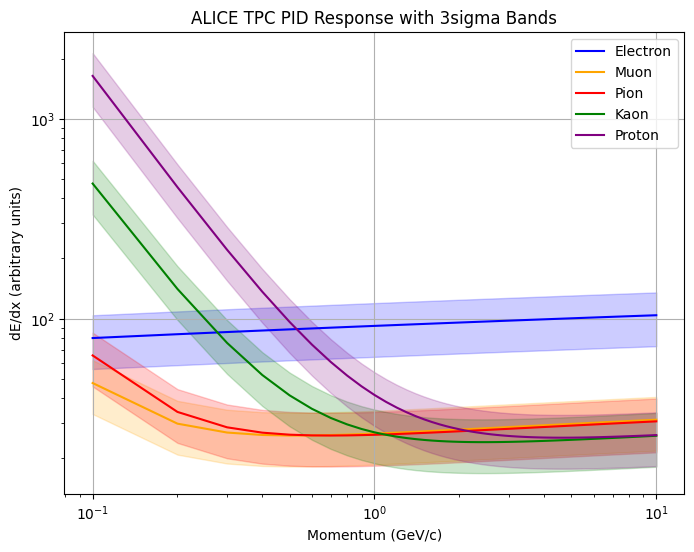

In [5]:
#PID PLOT WITH BANDS
import numpy as np
import matplotlib.pyplot as plt

def bethe_bloch(momentum, mass, charge=1):
    # Constants for Bethe-Bloch approximation
    K = 0.307075  # MeV mol^-1 cm^2
    Z = charge  # Particle charge
    I = 0.000016  # Mean excitation potential (MeV)
    m_e = 0.511  # Electron mass in MeV/c^2
    rho = 1  # Density of the material (relative to water, for simplicity)

    # Relativistic terms
    beta = momentum / np.sqrt(momentum**2 + mass**2)
    gamma = 1 / np.sqrt(1 - beta**2)
    
    # Bethe-Bloch equation (simplified)
    dEdx = ((K * Z**2 * rho) / (beta**2) * (0.5 * np.log(2 * m_e * beta**2 * gamma**2 / I**2) - beta**2)) * 17
    
    return dEdx

def tpc_pid_response(momentum, particle_type, stretch_factor=1):
    mass_dict = {
        'electron': 0.000511,
        'muon': 0.10566,
        'pion': 0.13957,
        'kaon': 0.49367,
        'proton': 0.93827
    }
    
    mass = mass_dict.get(particle_type, 0.13957)  # Default to pion mass if not found
    dEdx = bethe_bloch(momentum, mass) * stretch_factor
    lower_band = dEdx * 0.7
    upper_band = dEdx * 1.3
    
    return dEdx, lower_band, upper_band

def error_extremes(momentum, particle_type, stretch_factor):
    _, lower_band, upper_band = tpc_pid_response(momentum, particle_type, stretch_factor)
    return upper_band, lower_band

def random_gaussian(mean, sigma):

    return np.random.normal(mean, sigma)

def gaussian_tpc_response(momentum, particle_type, stretch_factor):

    # Get the mean dE/dx from TPC PID response
    mean_dEdx, _, _ = tpc_pid_response(momentum, particle_type,stretch_factor)
    
    # Calculate the extremes for the 3σ band
    upper_band, lower_band = error_extremes(momentum, particle_type, stretch_factor)
    
    # Estimate σ as 1/3rd of the difference between the upper and lower bands
    sigma_dEdx = (upper_band - lower_band) / 6
    
    # Generate a random dE/dx value from a Gaussian distribution
    random_dEdx = random_gaussian(mean_dEdx, sigma_dEdx)
    
    return random_dEdx

 # Example usage
momentum = .3  # Example momentum in GeV/c
particle_type = 'proton'  # Example particle type
x=1000 #Amount of random numbers

rn=[]
for _ in range(x):

    if (particle_type == 'electron'):
        stretch_factor=1
    elif (particle_type == 'muon'):
        stretch_factor=.41
    elif (particle_type == 'pion'):
        stretch_factor=.41
    elif (particle_type == 'kaon'):
        stretch_factor=.38
    elif (particle_type == 'proton'):
        stretch_factor=.40

    random_value = gaussian_tpc_response(momentum, particle_type, stretch_factor)
    rn.append(random_value)
print(rn)

xvalues=[]
for _ in range(x):
    xvalues.append(momentum)
print(xvalues)

def plot_tpc_pid_response(momentum_range):
    """
    Plot the TPC PID response and error bands for various particle types.
    """
    # Calculate responses and PID bands for different particle species
    particle_types = {
        'Electron': {'color': 'blue', 'stretch_factor': 1},
        'Muon': {'color': 'orange', 'stretch_factor': 0.41},
        'Pion': {'color': 'red', 'stretch_factor': 0.41},
        'Kaon': {'color': 'green', 'stretch_factor': 0.38},
        'Proton': {'color': 'purple', 'stretch_factor': 0.4}
    }
    
    plt.figure(figsize=(8, 6))
    
    for particle, settings in particle_types.items():
        response, lower_band, upper_band = tpc_pid_response(momentum_range, particle.lower(), settings['stretch_factor'])
        plt.plot(momentum_range, response, label=particle, color=settings['color'])
        plt.fill_between(momentum_range, lower_band, upper_band, color=settings['color'], alpha=0.2)
    
   # plt.plot(xvalues,rn, color= 'black')
    
    plt.xlabel('Momentum (GeV/c)')
    plt.ylabel('dE/dx (arbitrary units)')
    plt.xscale('log')  # Log scale for x-axis
    plt.yscale('log')  # Log scale for y-axis
    plt.title('ALICE TPC PID Response with 3sigma Bands')
    plt.legend()
    plt.grid(True)
    #plt.savefig("PID_empty.pdf")
    plt.show()
    
# Generate a momentum range and plot
momentum_range = np.linspace(0.1, 10, 100)  # Momentum range from 0.1 to 10 GeV/c
plot_tpc_pid_response(momentum_range)


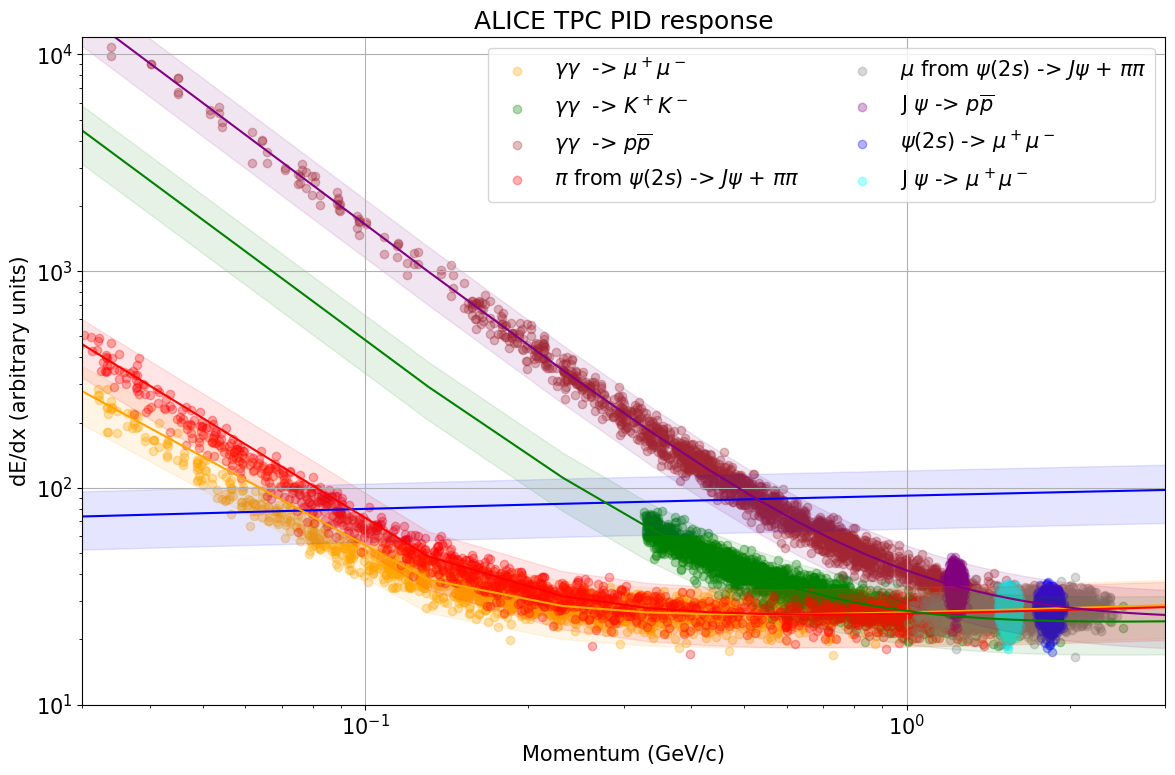

In [6]:
n_events = 1000

plt.rcParams.update({'font.size': 15})

#Generate Jpsi events
jpsimuon_events = generate_jpsi_events(n_events)
jpsimuon1_dEdx = []
jpsimuon2_dEdx = []
jpsimuon1_momenta = []
jpsimuon2_momenta = []

# Iterate over events and calculate PID response for muons
for event in jpsimuon_events:
    jpsimuon1_p, jpsimuon2_p = event  # Extract momenta of muons
    
    # Calculate momentum magnitudes
    jpsimuon1_momentum = np.linalg.norm(jpsimuon1_p)
    jpsimuon2_momentum = np.linalg.norm(jpsimuon2_p)
    
    # Append momenta for later use
    jpsimuon1_momenta.append(jpsimuon1_momentum)
    jpsimuon1_momenta.append(jpsimuon2_momentum)
    
    # Calculate PID response (dE/dx) for each muon
    dEdx_jpsimuon1 = gaussian_tpc_response(jpsimuon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_jpsimuon2 = gaussian_tpc_response(jpsimuon2_momentum, 'muon', stretch_factor=0.41)
    
    # Store the dE/dx values
    jpsimuon1_dEdx.append(dEdx_jpsimuon1)
    jpsimuon1_dEdx.append(dEdx_jpsimuon2)

# Generate photon-photon events
photonmuon_events = generate_photon_photon_events(n_events)
photonmuon1_dEdx = []
photonmuon2_dEdx = []
photonmuon1_momenta = []
photonmuon2_momenta = []

# Iterate over events and calculate PID response for muons
for event in photonmuon_events:
    photonmuon1_p, photonmuon2_p = event  # Extract momenta of muons

    # Calculate momentum magnitudes
    photonmuon1_momentum = np.linalg.norm(photonmuon1_p)
    photonmuon2_momentum = np.linalg.norm(photonmuon2_p)
    
    # Append momenta for later use
    photonmuon1_momenta.append(photonmuon1_momentum)
    photonmuon1_momenta.append(photonmuon2_momentum)
    
    # Calculate PID response (dE/dx) with Gaussian variations for each muon
    dEdx_photonmuon1 = gaussian_tpc_response(photonmuon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_photonmuon2 = gaussian_tpc_response(photonmuon2_momentum, 'muon', stretch_factor=0.41)
    
    # Store the dE/dx values
    photonmuon1_dEdx.append(dEdx_photonmuon1)
    photonmuon1_dEdx.append(dEdx_photonmuon2)

#Generate psi2s muon events
psi2smuon_events = generate_psi2S_muons_events(n_events)
psi2smuon1_dEdx = []
psi2smuon2_dEdx = []
psi2smuon1_momenta = []
psi2smuon2_momenta = []

for event in psi2smuon_events:
    psi2smuon1_p, psi2smuon2_p = event  # Extract momenta of muons

    # Calculate momentum magnitudes
    psi2smuon1_momentum = np.linalg.norm(psi2smuon1_p)
    psi2smuon2_momentum = np.linalg.norm(psi2smuon2_p)
    
    # Append momenta for later use
    psi2smuon1_momenta.append(psi2smuon1_momentum)
    psi2smuon1_momenta.append(psi2smuon2_momentum)
    
    # Calculate PID response (dE/dx) with Gaussian variations for each muon
    dEdx_psi2smuon1 = gaussian_tpc_response(psi2smuon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_psi2smuon2 = gaussian_tpc_response(psi2smuon2_momentum, 'muon', stretch_factor=0.41)
    
    # Store the dE/dx values
    psi2smuon1_dEdx.append(dEdx_psi2smuon1)
    psi2smuon1_dEdx.append(dEdx_psi2smuon2)


#Generate psi2s muon pion events
psi2s_jpsi_pions_events = generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_events)
psi2s_jpsi_muon1_dEdx = []
psi2s_jpsi_muon2_dEdx = []
psi2s_jpsi_pion1_dEdx = []
psi2s_jpsi_pion2_dEdx = []
psi2s_jpsi_muon1_momenta = []
psi2s_jpsi_muon2_momenta = []
psi2s_jpsi_pion1_momenta = []
psi2s_jpsi_pion2_momenta = []

for event in psi2s_jpsi_pions_events:
    psi2s_jpsi_muon1_p, psi2s_jpsi_muon2_p, psi2s_jpsi_pion1_p, psi2s_jpsi_pion2_p, *_ = event

    psi2s_jpsi_muon1_momentum = np.linalg.norm(psi2s_jpsi_muon1_p)
    psi2s_jpsi_muon2_momentum = np.linalg.norm(psi2s_jpsi_muon2_p)
    psi2s_jpsi_pion1_momentum = np.linalg.norm(psi2s_jpsi_pion1_p)
    psi2s_jpsi_pion2_momentum = np.linalg.norm(psi2s_jpsi_pion2_p)

    psi2s_jpsi_muon1_momenta.append(psi2s_jpsi_muon1_momentum)
    psi2s_jpsi_muon1_momenta.append(psi2s_jpsi_muon2_momentum)
    psi2s_jpsi_pion1_momenta.append(psi2s_jpsi_pion1_momentum)
    psi2s_jpsi_pion1_momenta.append(psi2s_jpsi_pion2_momentum)    

    dEdx_psi2s_jpsi_muon1 = gaussian_tpc_response(psi2s_jpsi_muon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_psi2s_jpsi_muon2 = gaussian_tpc_response(psi2s_jpsi_muon2_momentum, 'muon', stretch_factor=0.41)
    dEdx_psi2s_jpsi_pion1 = gaussian_tpc_response(psi2s_jpsi_pion1_momentum, 'pion', stretch_factor=0.41)
    dEdx_psi2s_jpsi_pion2 = gaussian_tpc_response(psi2s_jpsi_pion2_momentum, 'pion', stretch_factor=0.41)

    psi2s_jpsi_muon1_dEdx.append(dEdx_psi2s_jpsi_muon1)
    psi2s_jpsi_muon1_dEdx.append(dEdx_psi2s_jpsi_muon2)
    psi2s_jpsi_pion1_dEdx.append(dEdx_psi2s_jpsi_pion1)
    psi2s_jpsi_pion1_dEdx.append(dEdx_psi2s_jpsi_pion2)

# Generate photon-photon kaon events
photonkaon_events = generate_pp_kaon_events(n_events)
photonkaon1_dEdx = []
photonkaon2_dEdx = []
photonkaon1_momenta = []
photonkaon2_momenta = []

# Iterate over events and calculate PID response for kaons
for event in photonkaon_events:
    photonkaon1_p, photonkaon2_p = event  # Extract momenta of kaons

    # Calculate momentum magnitudes
    photonkaon1_momentum = np.linalg.norm(photonkaon1_p)
    photonkaon2_momentum = np.linalg.norm(photonkaon2_p)
    
    # Append momenta for later use
    photonkaon1_momenta.append(photonkaon1_momentum)
    photonkaon1_momenta.append(photonkaon2_momentum)
    
    # Calculate PID response (dE/dx) with Gaussian variations for each kaon
    dEdx_photonkaon1 = gaussian_tpc_response(photonkaon1_momentum, 'kaon', stretch_factor=0.38)
    dEdx_photonkaon2 = gaussian_tpc_response(photonkaon2_momentum, 'kaon', stretch_factor=0.38)
    
    # Store the dE/dx values
    photonkaon1_dEdx.append(dEdx_photonkaon1)
    photonkaon1_dEdx.append(dEdx_photonkaon2)

# Generate photon-photon proton events
photonproton_events = generate_photon_photon_proton_events(n_events)
photonproton1_dEdx = []
photonproton2_dEdx = []
photonproton1_momenta = []
photonproton2_momenta = []

# Iterate over events and calculate PID response for kaons
for event in photonproton_events:
    photonproton1_p, photonproton2_p = event  # Extract momenta of kaons

    # Calculate momentum magnitudes
    photonproton1_momentum = np.linalg.norm(photonproton1_p)
    photonproton2_momentum = np.linalg.norm(photonproton2_p)
    
    # Append momenta for later use
    photonproton1_momenta.append(photonproton1_momentum)
    photonproton1_momenta.append(photonproton2_momentum)
    
    # Calculate PID response (dE/dx) with Gaussian variations for each kaon
    dEdx_photonproton1 = gaussian_tpc_response(photonproton1_momentum, 'proton', stretch_factor=0.4)
    dEdx_photonproton2 = gaussian_tpc_response(photonproton2_momentum, 'proton', stretch_factor=0.4)
    
    # Store the dE/dx values
    photonproton1_dEdx.append(dEdx_photonproton1)
    photonproton1_dEdx.append(dEdx_photonproton2)

#Generate Jpsi proton events
jpsiproton_events = generate_jpsi_protons_events(n_events)
jpsiproton1_dEdx = []
jpsiproton2_dEdx = []
jpsiproton1_momenta = []
jpsiproton2_momenta = []

# Iterate over events and calculate PID response for protons
for event in jpsiproton_events:
    jpsiproton1_p, jpsiproton2_p = event  # Extract momenta of protons
    
    # Calculate momentum magnitudes
    jpsiproton1_momentum = np.linalg.norm(jpsiproton1_p)
    jpsiproton2_momentum = np.linalg.norm(jpsiproton2_p)
    
    # Append momenta for later use
    jpsiproton1_momenta.append(jpsiproton1_momentum)
    jpsiproton1_momenta.append(jpsiproton2_momentum)
    
    # Calculate PID response (dE/dx) for each muon
    dEdx_jpsiproton1 = gaussian_tpc_response(jpsiproton1_momentum, 'proton', stretch_factor=0.4)
    dEdx_jpsiproton2 = gaussian_tpc_response(jpsiproton2_momentum, 'proton', stretch_factor=0.4)
    
    # Store the dE/dx values
    jpsiproton1_dEdx.append(dEdx_jpsiproton1)
    jpsiproton1_dEdx.append(dEdx_jpsiproton2)

#Generate pentaquark muon proton events
pentaquark_muons_proton_events = generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_events)
pentaquark_muon1_dEdx = []
pentaquark_muon2_dEdx = []
pentaquark_proton_dEdx = []
pentaquark_muon1_momenta = []
pentaquark_muon2_momenta = []
pentaquark_proton_momenta = []

for event in pentaquark_muons_proton_events:
    pentaquark_muon1_p, pentaquark_muon2_p, pentaquark_proton_p, *_ = event

    pentaquark_muon1_momentum = np.linalg.norm(pentaquark_muon1_p)
    pentaquark_muon2_momentum = np.linalg.norm(pentaquark_muon2_p)
    pentaquark_proton_momentum = np.linalg.norm(pentaquark_proton_p)

    pentaquark_muon1_momenta.append(pentaquark_muon1_momentum)
    pentaquark_muon1_momenta.append(pentaquark_muon2_momentum)
    pentaquark_proton_momenta.append(pentaquark_proton_momentum)
  
    dEdx_pentaquark_muon1 = gaussian_tpc_response(pentaquark_muon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_pentaquark_muon2 = gaussian_tpc_response(pentaquark_muon2_momentum, 'muon', stretch_factor=0.41)
    dEdx_pentaquark_proton = gaussian_tpc_response(pentaquark_proton_momentum, 'proton', stretch_factor=0.4)
  
    pentaquark_muon1_dEdx.append(dEdx_pentaquark_muon1)
    pentaquark_muon1_dEdx.append(dEdx_pentaquark_muon2)
    pentaquark_proton_dEdx.append(dEdx_pentaquark_proton)

# Plot the results
plt.figure(figsize=(12, 8)) 


#Photon Muon 
plt.scatter(photonmuon1_momenta, photonmuon1_dEdx, color='orange', alpha=.3, label=r'$\gamma \gamma$  -> $\mu^+ \mu^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Muon 2 PID Response')
plt.grid(True)
plt.legend()

#photon Kaon dE/dx vs Momentum
plt.scatter(photonkaon1_momenta, photonkaon1_dEdx, color='green', alpha=.3, label=r'$\gamma \gamma$  -> $K^+ K^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Kaon PID Response')
plt.grid(True)
plt.legend()

#photon proton dE/dx vs Momentum
plt.scatter(photonproton1_momenta, photonproton1_dEdx, color='brown', alpha=.3, label=r'$\gamma \gamma$  -> $p \overline{p}$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Proton PID Response')
plt.grid(True)
plt.legend()

# Scatter plot for Pions
plt.scatter(psi2s_jpsi_pion1_momenta, psi2s_jpsi_pion1_dEdx, color='red', alpha=0.3, label=r'$\pi$ from $\psi (2s)$ -> $J \psi$ + $\pi \pi$')
plt.xlabel('Event Index')
plt.ylabel('Momentum (GeV/c)')
plt.title('Momentum Distribution for Muons from psi(2S) J/psi Events')
plt.legend()
plt.grid(True)

# Scatter plot for Muons
plt.scatter(psi2s_jpsi_muon1_momenta, psi2s_jpsi_muon1_dEdx, color='grey', alpha=0.3, label=r'$\mu$ from $\psi (2s)$ -> $J \psi$ + $\pi \pi$')
plt.xlabel('Event Index')
plt.ylabel('Momentum (GeV/c)')
plt.title('Momentum Distribution for Muons from psi(2S) J/psi Events')
plt.legend()
plt.grid(True)

#Jpsi Proton dE/dx vs Momentum
plt.scatter(jpsiproton1_momenta, jpsiproton1_dEdx, color='purple', alpha=.3, label=r'J $\psi$ -> $p \overline{p}$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Proton 1 PID Response')
plt.grid(True)
plt.legend()

#Psi2s Muon 
plt.scatter(psi2smuon1_momenta, psi2smuon1_dEdx, color='blue', alpha=.3, label=r'$\psi (2s)$ -> $\mu^+ \mu^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Muon 2 PID Response')
plt.grid(True)
plt.legend()

#Jpsi Muon dE/dx vs Momentum
plt.scatter(jpsimuon1_momenta, jpsimuon1_dEdx, color='cyan', alpha=.3, label=r'J $\psi$ -> $\mu^+ \mu^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Muon 1 PID Response')
plt.grid(True)
plt.legend()

# Scatter plot for Pentaquark Muons
# plt.scatter(pentaquark_muon1_momenta, pentaquark_muon1_dEdx, color='brown', alpha=0.3, label=r'$\mu$ from pentaquark')
# plt.xlabel('Event Index')
# plt.ylabel('Momentum (GeV/c)')
# plt.title('Momentum Distribution for Muons from Pentaquark Events')
# plt.legend()
# plt.grid(True)

# # Scatter plot for Pentaquark Proton 
# plt.scatter(pentaquark_proton_momenta, pentaquark_proton_dEdx, color='gray', alpha=0.3, label=r'p from pentaquark')
# plt.xlabel('Event Index')
# plt.ylabel('Momentum (GeV/c)')
# plt.title('Momentum Distribution for Proton from Pentaquark Events')
# plt.legend()
# plt.grid(True)


particle_types = {
        'Electron': {'color': 'blue', 'stretch_factor': 1},
        'Muon': {'color': 'orange', 'stretch_factor': 0.41},
        'Pion': {'color': 'red', 'stretch_factor': 0.41},
        'Kaon': {'color': 'green', 'stretch_factor': 0.38},
        'Proton': {'color': 'purple', 'stretch_factor': 0.4}
    }
    
    
momentum_range = np.linspace(0.03, 10, 100)   
for particle, settings in particle_types.items():
    response, lower_band, upper_band = tpc_pid_response(momentum_range, particle.lower(), settings['stretch_factor'])
    plt.plot(momentum_range, response, label = '_nolegend_', color=settings['color'])
    plt.fill_between(momentum_range, lower_band, upper_band, color=settings['color'], alpha=0.1)
    # plt.legend()
    
   # plt.plot(xvalues,rn, color= 'black')
    

plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.03, 3])
plt.ylim([10, 12000])
plt.title('ALICE TPC PID response')
plt.legend(loc='upper right', ncol = 2, fontsize="15") #, fontsize="15"
plt.grid(True)

# Get current axes and create a legend with 2 columns
# ax = plt.gca()
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=2)
# ax.set_xlim([0.03, 3])
# ax.set_ylim([10, 100000])

# Adjust layout to reserve space for the legend (e.g. top 10% of the figure)
plt.tight_layout() #rect=[0, 0, 1, 0.9]
plt.show()



# Creation of Dataframes

## Generation 1

In [7]:

import pandas as pd

data_for_pp_muons_gen1 = []
pp_muons_events = generate_photon_photon_events(n_photon_photon)
for event_id, event in enumerate(pp_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
df_pp_muons_gen1 = pd.DataFrame(data_for_pp_muons_gen1)

data_for_jpsimuons_gen1= []
jpsi_muons_events = generate_jpsi_events(n_jpsi)
for event_id, event in enumerate(jpsi_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
df_jpsimuons_gen1 = pd.DataFrame(data_for_jpsimuons_gen1)

data_for_jpsiprotons_gen1= []
jpsi_protons_events = generate_jpsi_protons_events(n_jpsi_protons)
for event_id, event in enumerate(jpsi_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
df_jpsiprotons_gen1 = pd.DataFrame(data_for_jpsiprotons_gen1)

data_for_psi2smuons_gen1 = []
psi2s_muons_events = generate_psi2S_muons_events(n_psi2S_muons)
for event_id, event in enumerate(psi2s_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
df_psi2smuons_gen1 = pd.DataFrame(data_for_psi2smuons_gen1)

data_for_pp_kaons_gen1 = []
pp_kaons_events = generate_pp_kaon_events(n_pp_kaon)
for event_id, event in enumerate(pp_kaons_events):
    kaon1_p, kaon2_p = event
    kaon1_E = np.sqrt(np.linalg.norm(kaon1_p)**2 + m_kaon**2)
    kaon2_E = np.sqrt(np.linalg.norm(kaon2_p)**2 + m_kaon**2)
    data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon1_p[0], "py": kaon1_p[1], "pz": kaon1_p[2], "Energy": kaon1_E})
    data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon2_p[0], "py": kaon2_p[1], "pz": kaon2_p[2], "Energy": kaon2_E})
df_pp_kaons_gen1 = pd.DataFrame(data_for_pp_kaons_gen1)

data_for_pp_protons_gen1 = []
pp_protons_events = generate_photon_photon_proton_events(n_photon_photon_proton)
for event_id, event in enumerate(pp_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    data_for_pp_protons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    data_for_pp_protons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
df_pp_protons_gen1 = pd.DataFrame(data_for_pp_protons_gen1)

data_for_psi2s_muons_pions_gen1 = []
psi2s_muons_pions_events = generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_psi2S_jpsi_pions)
for event_id, event in enumerate(psi2s_muons_pions_events):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E = event
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p_lab_smeared[0], "py": muon1_p_lab_smeared[1], "pz": muon1_p_lab_smeared[2], "Energy": m1_E})
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p_lab_smeared[0], "py": muon2_p_lab_smeared[1], "pz": muon2_p_lab_smeared[2], "Energy": m2_E})
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p[0], "py": pion1_p[1], "pz": pion1_p[2], "Energy": p1_E})
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p[0], "py": pion2_p[1], "pz": pion2_p[2], "Energy": p2_E})
df_psi2s_muons_pions_gen1 = pd.DataFrame(data_for_psi2s_muons_pions_gen1)
df_psi2s_muons_pions_gen1.head()

data_for_pentaquark_gen1 = []
pentaquark_events = generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_pq1)
for event_id, event in enumerate(pentaquark_events):
    muon1_p, muon2_p, proton_p, _, _, _ = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    proton_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    data_for_pentaquark_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_pentaquark_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
    data_for_pentaquark_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton_p[0], "py": proton_p[1], "pz": proton_p[2], "Energy": proton_E})
df_pentaquark_gen1 = pd.DataFrame(data_for_pentaquark_gen1)

data_for_jpsi_four_pions_gen1 = []
jpsi_four_pions_events = generate_jpsi_four_pions(n_jpsi_4pi)
for event_id, event in enumerate(jpsi_four_pions_events):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, pion4_p, p1_E, p2_E, p3_E, p4_E = event
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p_lab_smeared[0], "py": pion1_p_lab_smeared[1], "pz": pion1_p_lab_smeared[2], "Energy": p1_E})
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p_lab_smeared[0], "py": pion2_p_lab_smeared[1], "pz": pion2_p_lab_smeared[2], "Energy": p2_E})
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion3_p[0], "py": pion3_p[1], "pz": pion3_p[2], "Energy": p3_E})
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion4_p[0], "py": pion4_p[1], "pz": pion4_p[2], "Energy": p4_E})
df_jpsi_four_pions_gen1 = pd.DataFrame(data_for_jpsi_four_pions_gen1)

# data_for_jpsi_three_pions_gen1 = []
# jpsi_three_pions_events = generate_jpsi_3pions_events(100)
# for event_id, event in enumerate(jpsi_three_pions_events):
#     pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, p1_E, p2_E, p3_E, = event
#     data_for_jpsi_three_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p_lab_smeared[0], "py": pion1_p_lab_smeared[1], "pz": pion1_p_lab_smeared[2], "Energy": p1_E})
#     data_for_jpsi_three_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p_lab_smeared[0], "py": pion2_p_lab_smeared[1], "pz": pion2_p_lab_smeared[2], "Energy": p2_E})
#     data_for_jpsi_three_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion3_p[0], "py": pion3_p[1], "pz": pion3_p[2], "Energy": p3_E})
#     df_jpsi_three_pions_gen1 = pd.DataFrame(data_for_jpsi_three_pions_gen1)


In [8]:
n_training = 30000

training_data_for_pp_muons_gen1 = []
training_pp_muons_events = generate_photon_photon_events(n_training)
for event_id, event in enumerate(training_pp_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    training_data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    training_data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
training_df_for_pp_muons_gen1 = pd.DataFrame(training_data_for_pp_muons_gen1)

training_data_for_jpsimuons_gen1= []
training_jpsi_muons_events = generate_jpsi_events(n_training)
for event_id, event in enumerate(training_jpsi_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    training_data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    training_data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
training_df_jpsimuons_gen1 = pd.DataFrame(training_data_for_jpsimuons_gen1)

training_data_for_jpsiprotons_gen1= []
training_jpsi_protons_events = generate_jpsi_protons_events(n_training)
for event_id, event in enumerate(training_jpsi_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    training_data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    training_data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
training_df_jpsiprotons_gen1 = pd.DataFrame(training_data_for_jpsiprotons_gen1)

training_data_for_psi2smuons_gen1 = []
training_psi2s_muons_events = generate_psi2S_muons_events(n_training)
for event_id, event in enumerate(training_psi2s_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    training_data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    training_data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
training_df_psi2smuons_gen1 = pd.DataFrame(training_data_for_psi2smuons_gen1)

training_data_for_pp_kaons_gen1 = []
training_pp_kaons_events = generate_pp_kaon_events(n_training)
for event_id, event in enumerate(training_pp_kaons_events):
    kaon1_p, kaon2_p = event
    kaon1_E = np.sqrt(np.linalg.norm(kaon1_p)**2 + m_kaon**2)
    kaon2_E = np.sqrt(np.linalg.norm(kaon2_p)**2 + m_kaon**2)
    training_data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon1_p[0], "py": kaon1_p[1], "pz": kaon1_p[2], "Energy": kaon1_E})
    training_data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon2_p[0], "py": kaon2_p[1], "pz": kaon2_p[2], "Energy": kaon2_E})
training_df_pp_kaons_gen1 = pd.DataFrame(training_data_for_pp_kaons_gen1)

training_data_for_pp_protons_gen1 = []
training_pp_protons_events = generate_photon_photon_proton_events(n_training)
for event_id, event in enumerate(training_pp_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    training_data_for_pp_protons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    training_data_for_pp_protons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
training_df_pp_protons_gen1 = pd.DataFrame(training_data_for_pp_protons_gen1)

training_data_for_psi2s_muons_pions_gen1 = []
training_psi2s_muons_pions_events = generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_training)
for event_id, event in enumerate(training_psi2s_muons_pions_events):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E = event
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p_lab_smeared[0], "py": muon1_p_lab_smeared[1], "pz": muon1_p_lab_smeared[2], "Energy": m1_E})
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p_lab_smeared[0], "py": muon2_p_lab_smeared[1], "pz": muon2_p_lab_smeared[2], "Energy": m2_E})
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p[0], "py": pion1_p[1], "pz": pion1_p[2], "Energy": p1_E})
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p[0], "py": pion2_p[1], "pz": pion2_p[2], "Energy": p2_E})
training_df_psi2s_muons_pions_gen1 = pd.DataFrame(training_data_for_psi2s_muons_pions_gen1)
training_df_psi2s_muons_pions_gen1.head()

,EventID,Particle,px,py,pz,Energy
0,0,muon,1.542804,-0.397438,1.122780,1.951922
1,0,muon,-0.977800,0.363843,-0.638269,1.227610
2,0,pion,-0.011992,-0.020624,-0.218724,0.260555
3,0,pion,-0.572864,0.058204,-0.274919,0.235256
4,1,muon,0.813055,1.409295,-1.093721,1.963303


In [9]:
df_pp_protons_gen1.head()

,EventID,Particle,px,py,pz,Energy
0,0,proton,-0.039917,-0.487666,-0.256072,1.088498
1,0,proton,0.039917,0.487666,0.256072,1.088498
2,1,proton,-0.093067,0.073452,0.012737,0.945549
3,1,proton,0.093067,-0.073452,-0.012737,0.945549
4,2,proton,0.059468,-0.254726,-0.276390,1.012254


## Generation 2 

In [10]:
stretch_factors = {
    'electron': 1.0,
    'muon': .41,
    'pion': .41,
    'kaon': .38,
    'proton': .4
}

#NSIGMA AWAY FROM EACH PARTICLE
def calculate_nsigma(momentum, dEdx_observed, stretch_factors=None, error_fraction=0.3):
  
    if stretch_factors is None:
        stretch_factors = {
            'electron': 1.0,
            'muon': .41,
            'pion': .41,
            'kaon': .38,
            'proton': .40
        }
    
    particle_types = ['electron', 'muon', 'pion', 'kaon', 'proton']
    nsigma_dict = {}

    for particle in particle_types:
        stretch_factor = stretch_factors.get(particle, 1.0)
        dEdx_expected, _, _ = tpc_pid_response(momentum, particle, stretch_factor)
        sigma = dEdx_expected * error_fraction  # Standard deviation as a fraction of the expected dE/dx
        nsigma = (dEdx_observed - dEdx_expected) / sigma
        nsigma_dict[particle] = nsigma
    
    return nsigma_dict


# Apply the calculate_nsigma function and expand the results into separate columns
nsigma_columns = ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']


In [11]:
df_jpsimuons_gen2 = df_jpsimuons_gen1.copy()
df_jpsimuons_gen2['Momentum']= np.sqrt(df_jpsimuons_gen2['px']**2 + df_jpsimuons_gen2['py']**2 + df_jpsimuons_gen2['pz']**2)
df_jpsimuons_gen2['PID Signal'] = df_jpsimuons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]), axis=1)
df_jpsimuons_gen2[nsigma_columns] = df_jpsimuons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_jpsimuons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,1.190052,0.131217,0.969997,1.544506,1.540888,26.694660,-2.389784,-0.084894,-0.024783,0.271492,-0.460299
1,0,muon,-1.190052,-0.131217,-0.969997,1.544506,1.540888,27.202425,-2.371837,-0.023105,0.038150,0.340060,-0.405651
2,1,muon,1.331268,0.704925,0.175132,1.520207,1.516531,24.773165,-2.456928,-0.315436,-0.259878,0.005869,-0.687904
3,1,muon,-1.331268,-0.704925,-0.175132,1.520207,1.516531,28.803230,-2.314356,0.175512,0.240107,0.549086,-0.257549
4,2,muon,-0.778100,0.166241,1.303920,1.531159,1.527509,31.284937,-2.227002,0.475961,0.546254,0.887158,0.019417
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249595,124797,muon,1.119811,1.029121,0.407303,1.578013,1.574472,26.414366,-2.400805,-0.123751,-0.063964,0.242013,-0.461124
249596,124798,muon,-0.087894,1.537732,0.061767,1.545097,1.541480,30.513850,-2.254814,0.379761,0.448478,0.787410,-0.048644
249597,124798,muon,0.087894,-1.537732,-0.061767,1.545097,1.541480,30.387455,-2.259282,0.364381,0.432813,0.770341,-0.062250
249598,124799,muon,-0.991956,-1.186336,-0.247485,1.569644,1.566084,28.995005,-2.309396,0.191113,0.256659,0.589099,-0.188414


In [12]:
training_df_jpsimuons_gen2 = training_df_jpsimuons_gen1.copy()
training_df_jpsimuons_gen2['Momentum']= np.sqrt(training_df_jpsimuons_gen2['px']**2 + training_df_jpsimuons_gen2['py']**2 + training_df_jpsimuons_gen2['pz']**2)
training_df_jpsimuons_gen2['PID Signal'] = training_df_jpsimuons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]), axis=1)
training_df_jpsimuons_gen2[nsigma_columns] = training_df_jpsimuons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_jpsimuons_gen2.head()

In [13]:
df_jpsiprotons_gen2 = df_jpsiprotons_gen1.copy()
df_jpsiprotons_gen2['Momentum']= np.sqrt(df_jpsiprotons_gen2['px']**2 + df_jpsiprotons_gen2['py']**2 + df_jpsiprotons_gen2['pz']**2)
df_jpsiprotons_gen2['PID Signal'] = df_jpsiprotons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_jpsiprotons_gen2[nsigma_columns] = df_jpsiprotons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_jpsiprotons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,proton,0.648732,0.648960,-0.818172,1.546367,1.229393,36.307772,-2.033753,1.151721,1.226812,1.397695,0.092179
1,0,proton,-0.648732,-0.648960,0.818172,1.546367,1.229393,34.661422,-2.092682,0.948349,1.020036,1.183169,-0.063148
2,1,proton,1.059494,0.604689,-0.131044,1.544407,1.226927,35.837025,-2.050458,1.094140,1.168177,1.334388,0.043104
3,1,proton,-1.059494,-0.604689,0.131044,1.544407,1.226927,38.191498,-1.966174,1.385022,1.463924,1.641055,0.264934
4,2,proton,0.231087,0.893661,-0.825370,1.553419,1.238251,32.398251,-2.174155,0.666940,0.734201,0.894561,-0.261651
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4875,2437,proton,0.372315,0.227330,-1.157364,1.552299,1.236846,37.782253,-1.981434,1.332053,1.410444,1.596008,0.246043
4876,2438,proton,-0.174921,1.236529,0.070213,1.563450,1.250812,31.151962,-2.219376,0.510559,0.575570,0.740265,-0.359635
4877,2438,proton,0.174921,-1.236529,-0.070213,1.563450,1.250812,36.155127,-2.040469,1.127908,1.203360,1.394505,0.117956
4878,2439,proton,0.455980,1.019513,0.477109,1.534537,1.214479,35.712150,-2.054197,1.081588,1.154955,1.308040,0.007648


In [14]:
training_df_jpsiprotons_gen2 = training_df_jpsiprotons_gen1.copy()
training_df_jpsiprotons_gen2['Momentum']= np.sqrt(training_df_jpsiprotons_gen2['px']**2 + training_df_jpsiprotons_gen2['py']**2 + training_df_jpsiprotons_gen2['pz']**2)
training_df_jpsiprotons_gen2['PID Signal'] = training_df_jpsiprotons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_jpsiprotons_gen2[nsigma_columns] = training_df_jpsiprotons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
training_df_jpsiprotons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,proton,0.489521,0.872341,0.733421,1.555108,1.240369,36.846547,-2.015125,1.215679,1.292244,1.476739,0.164146
1,0,proton,-0.489521,-0.872341,-0.733421,1.555108,1.240369,34.762923,-2.089668,0.958438,1.030673,1.204736,-0.033632
2,1,proton,-0.459640,-0.247924,1.126265,1.555973,1.241454,29.368736,-2.282700,0.292277,0.353331,0.501246,-0.543998
3,1,proton,0.459640,0.247924,-1.126265,1.555973,1.241454,34.624151,-2.094694,0.941066,1.013045,1.187428,-0.044858
4,2,proton,-0.847074,-0.618690,0.596839,1.528520,1.206868,34.343237,-2.102795,0.914056,0.984361,1.124042,-0.134542
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,29997,proton,-0.200378,0.297432,-1.166204,1.538991,1.220102,31.884705,-2.191584,0.607257,0.672929,0.814705,-0.340821
59996,29998,proton,0.035905,-0.948229,-0.790205,1.550708,1.234849,35.965106,-2.046338,1.108131,1.182689,1.357364,0.070143
59997,29998,proton,-0.035905,0.948229,0.790205,1.550708,1.234849,34.713600,-2.091122,0.953578,1.025541,1.194138,-0.048291
59998,29999,proton,-0.172373,-1.222430,0.201451,1.563481,1.250852,34.950783,-2.083537,0.979293,1.052233,1.237048,0.003063


In [15]:
df_pentaquark_gen2 = df_pentaquark_gen1.copy()
df_pentaquark_gen2['Momentum']= np.sqrt(df_pentaquark_gen2['px']**2 + df_pentaquark_gen2['py']**2 + df_pentaquark_gen2['pz']**2)
df_pentaquark_gen2['PID Signal'] = df_pentaquark_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_pentaquark_gen2[nsigma_columns] = df_pentaquark_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_pentaquark_gen2.head()


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,-0.145982,-0.652112,1.130669,1.317625,1.313382,23.069822,-2.510633,-0.495736,-0.446478,-0.288661,-1.060486
1,0,muon,-0.401775,0.846652,-1.565956,1.828011,1.824955,24.529189,-2.474370,-0.383265,-0.326315,0.027054,-0.499328
2,0,proton,0.561763,-0.203319,0.448450,1.331689,0.747010,54.967133,-1.309348,3.643566,3.697536,2.634701,-0.071989
3,1,muon,-0.989456,0.205990,-0.802935,1.295115,1.290798,28.989183,-2.298538,0.236396,0.297818,0.480536,-0.508460
4,1,muon,1.694169,0.059681,0.902932,1.923596,1.920692,25.809097,-2.432077,-0.240501,-0.180246,0.212055,-0.299236


In [16]:
df_pp_kaons_gen2 = df_pp_kaons_gen1.copy()
df_pp_kaons_gen2['Momentum']= np.sqrt(df_pp_kaons_gen2['px']**2 + df_pp_kaons_gen2['py']**2 + df_pp_kaons_gen2['pz']**2)
df_pp_kaons_gen2['PID Signal'] = df_pp_kaons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_pp_kaons_gen2[nsigma_columns] = df_pp_kaons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_pp_kaons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,kaon,-0.341536,0.296601,-0.366351,0.763245,0.582093,45.737668,-1.624614,2.514642,2.505618,0.869258,-1.362988
1,0,kaon,0.341536,-0.296601,0.366351,0.763245,0.582093,34.288006,-2.052363,1.050699,1.043934,-0.182791,-1.856231
2,1,kaon,-0.321614,-0.236660,0.026147,0.635482,0.400159,52.626873,-1.323164,3.357963,3.181902,0.022996,-2.046575
3,1,kaon,0.321614,0.236660,-0.026147,0.635482,0.400159,49.249819,-1.452157,2.928584,2.763821,-0.192379,-2.129146
4,2,kaon,0.230698,0.269802,0.158364,0.628334,0.388708,53.195182,-1.297922,3.418950,3.223447,-0.054123,-2.092635
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33835,16917,kaon,-0.544680,0.278473,1.595346,1.778500,1.708611,24.768213,-2.462855,-0.340754,-0.283789,0.044376,-0.542507
33836,16918,kaon,-0.682994,0.024398,-0.149905,0.856305,0.699677,34.165549,-2.070532,1.014074,1.038915,0.237173,-1.459801
33837,16918,kaon,0.682994,-0.024398,0.149905,0.856305,0.699677,33.234672,-2.104938,0.895624,0.919788,0.139891,-1.510848
33838,16919,kaon,-0.092622,-0.101545,-0.327365,0.608086,0.355047,73.759949,-0.495650,5.966617,5.613307,0.736056,-1.852097


In [17]:
training_df_pp_kaons_gen2 = training_df_pp_kaons_gen1.copy()
training_df_pp_kaons_gen2['Momentum']= np.sqrt(training_df_pp_kaons_gen2['px']**2 + training_df_pp_kaons_gen2['py']**2 + training_df_pp_kaons_gen2['pz']**2)
training_df_pp_kaons_gen2['PID Signal'] = training_df_pp_kaons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_pp_kaons_gen2[nsigma_columns] = training_df_pp_kaons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_pp_kaons_gen2.head()



New process

In [18]:
df_pp_protons_gen2 = df_pp_protons_gen1.copy()
df_pp_protons_gen2['Momentum']= np.sqrt(df_pp_protons_gen2['px']**2 + df_pp_protons_gen2['py']**2 + df_pp_protons_gen2['pz']**2)
df_pp_protons_gen2['PID Signal'] = df_pp_protons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_pp_protons_gen2[nsigma_columns] = df_pp_protons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_pp_protons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,proton,-0.039917,-0.487666,-0.256072,1.088498,0.552254,81.282033,-0.287330,7.066046,7.023192,3.821900,-0.081447
1,0,proton,0.039917,0.487666,0.256072,1.088498,0.552254,100.431580,0.430290,9.516075,9.463126,5.507629,0.684678
2,1,proton,-0.093067,0.073452,0.012737,0.945549,0.119243,1144.985820,43.815111,90.773976,68.499467,7.740390,-0.096348
3,1,proton,0.093067,-0.073452,-0.012737,0.945549,0.119243,1155.265463,44.238408,91.618868,69.144379,7.839810,-0.067286
4,2,proton,0.059468,-0.254726,-0.276390,1.012254,0.380543,157.818143,2.712965,16.671890,16.052494,6.151909,0.221821
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33381,16690,proton,-0.905599,1.730015,1.083659,2.422235,2.233244,24.232432,-2.494055,-0.460414,-0.403334,0.010593,-0.363463
33382,16691,proton,0.468525,-0.428458,0.768623,1.368838,0.996932,33.401147,-2.123578,0.845702,0.904439,0.781622,-0.661928
33383,16691,proton,-0.468525,0.428458,-0.768623,1.368838,0.996932,38.611305,-1.934872,1.497578,1.565478,1.423503,-0.245222
33384,16692,proton,0.794584,-0.337441,-0.385127,1.331689,0.945279,43.556397,-1.750990,2.132580,2.204486,1.933886,-0.015876


In [19]:
training_df_pp_protons_gen2 = training_df_pp_protons_gen1.copy()
training_df_pp_protons_gen2['Momentum']= np.sqrt(training_df_pp_protons_gen2['px']**2 + training_df_pp_protons_gen2['py']**2 + training_df_pp_protons_gen2['pz']**2)
training_df_pp_protons_gen2['PID Signal'] = training_df_pp_protons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_pp_protons_gen2[nsigma_columns] = training_df_pp_protons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_pp_protons_gen2.head()



In [20]:
df_pp_muons_gen2 = df_pp_muons_gen1.copy()
df_pp_muons_gen2['Momentum']= np.sqrt(df_pp_muons_gen2['px']**2 + df_pp_muons_gen2['py']**2 + df_pp_muons_gen2['pz']**2)
df_pp_muons_gen2['PID Signal'] = df_pp_muons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_pp_muons_gen2[nsigma_columns] = df_pp_muons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_pp_muons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,0.296139,-0.563687,-0.637450,0.907164,0.900990,26.489579,-2.368370,-0.000556,0.040279,-0.188628,-1.407440
1,0,muon,-0.296139,0.563687,0.637450,0.907164,0.900990,28.658490,-2.289360,0.272325,0.316503,0.068854,-1.249752
2,1,muon,0.247539,-0.081851,0.072157,0.290422,0.270521,29.948818,-2.161958,0.303892,0.038224,-2.196324,-2.956362
3,1,muon,-0.247539,0.081851,-0.072157,0.290422,0.270521,32.533008,-2.060884,0.617737,0.329145,-2.098216,-2.923835
4,2,muon,-0.020252,-0.140869,0.004555,0.177309,0.142390,31.981841,-2.031268,-0.333351,-0.928661,-2.909292,-3.207666
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288853,2144426,muon,0.228257,0.179696,0.155637,0.346090,0.329567,22.751373,-2.454101,-0.486033,-0.618068,-2.193677,-2.930333
4288854,2144427,muon,-0.214920,-0.033515,-0.101121,0.262112,0.239873,29.867791,-2.156461,0.196647,-0.129941,-2.388055,-3.029538
4288855,2144427,muon,0.214920,0.033515,0.101121,0.262112,0.239873,26.048113,-2.306967,-0.254789,-0.539611,-2.508943,-3.068390
4288856,2144428,muon,-0.029203,0.064278,0.093142,0.157555,0.116875,41.390951,-1.626723,0.011665,-0.794113,-2.947200,-3.220604


In [21]:
training_df_pp_muons_gen2 = training_df_for_pp_muons_gen1.copy()
training_df_pp_muons_gen2['Momentum']= np.sqrt(training_df_pp_muons_gen2['px']**2 + training_df_pp_muons_gen2['py']**2 + training_df_pp_muons_gen2['pz']**2)
training_df_pp_muons_gen2['PID Signal'] = training_df_pp_muons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_pp_muons_gen2[nsigma_columns] = training_df_pp_muons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_pp_muons_gen2.head()


In [22]:
df_psi2s_muons_pions_gen2 = df_psi2s_muons_pions_gen1.copy()
df_psi2s_muons_pions_gen2['Momentum']= np.sqrt(df_psi2s_muons_pions_gen2['px']**2 + df_psi2s_muons_pions_gen2['py']**2 + df_psi2s_muons_pions_gen2['pz']**2)
df_psi2s_muons_pions_gen2['PID Signal'] = df_psi2s_muons_pions_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_psi2s_muons_pions_gen2[nsigma_columns] = df_psi2s_muons_pions_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_psi2s_muons_pions_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,0.927899,-1.149718,1.274901,1.954324,1.951466,29.358121,-2.309035,0.180843,0.249482,0.702469,0.135437
1,0,muon,-0.789603,0.481998,-0.827868,1.245924,1.241435,24.296734,-2.464144,-0.333865,-0.283356,-0.160998,-1.025742
2,0,pion,0.190152,-0.013083,-0.157343,0.283841,0.247155,28.738365,-2.203049,0.088713,-0.210543,-2.380899,-3.025023
3,0,pion,-0.350444,0.704659,-0.310358,0.190795,0.845977,28.191122,-2.302681,0.224910,0.263772,-0.075345,-1.411796
4,1,muon,1.469629,-1.578505,-0.091106,2.161239,2.158654,29.073013,-2.324545,0.121843,0.190245,0.676123,0.200609
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8475,2118,pion,-0.587977,0.475668,-0.357701,0.155751,0.836617,25.521036,-2.399703,-0.110356,-0.075973,-0.398821,-1.614197
8476,2119,muon,-0.424084,2.062565,0.745752,2.236366,2.233868,26.884672,-2.402210,-0.146036,-0.082709,0.376601,-0.038196
8477,2119,muon,0.382793,-1.017102,0.011651,1.091937,1.086813,26.822710,-2.366576,0.005610,0.056741,0.058963,-1.024950
8478,2119,pion,0.018496,-0.076200,0.112849,0.195865,0.137417,52.153812,-1.205192,1.442590,0.457748,-2.683841,-3.141461


In [23]:
training_df_psi2s_muons_pions_gen2 = training_df_psi2s_muons_pions_gen1.copy()
training_df_psi2s_muons_pions_gen2['Momentum']= np.sqrt(training_df_psi2s_muons_pions_gen2['px']**2 + training_df_psi2s_muons_pions_gen2['py']**2 + training_df_psi2s_muons_pions_gen2['pz']**2)
training_df_psi2s_muons_pions_gen2['PID Signal'] = training_df_psi2s_muons_pions_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_psi2s_muons_pions_gen2[nsigma_columns] = training_df_psi2s_muons_pions_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_psi2s_muons_pions_gen2.head()

In [24]:
df_psi2smuons_gen2 = df_psi2smuons_gen1.copy()
df_psi2smuons_gen2['Momentum']= np.sqrt(df_psi2smuons_gen2['px']**2 + df_psi2smuons_gen2['py']**2 + df_psi2smuons_gen2['pz']**2)
df_psi2smuons_gen2['PID Signal'] = df_psi2smuons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_psi2smuons_gen2[nsigma_columns] = df_psi2smuons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_psi2smuons_gen2



,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,1.614302,0.283988,-0.722642,1.794434,1.791321,27.949677,-2.353592,0.032501,0.097239,0.491195,-0.125893
1,0,muon,-1.614302,-0.283988,0.722642,1.794434,1.791321,23.665058,-2.503784,-0.483473,-0.428660,-0.095096,-0.617586
2,1,muon,1.805464,0.026211,-0.461603,1.866716,1.863723,26.640129,-2.401523,-0.134124,-0.072120,0.320635,-0.232732
3,1,muon,-1.805464,-0.026211,0.461603,1.866716,1.863723,23.551899,-2.509542,-0.504989,-0.450173,-0.102947,-0.592166
4,2,muon,-0.463361,-1.137458,-1.366405,1.840310,1.837274,28.757718,-2.326667,0.123654,0.190477,0.607910,-0.002845
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635,2317,muon,-0.297882,-0.465390,1.791528,1.877780,1.874805,27.428689,-2.374253,-0.040802,0.023079,0.429993,-0.134501
4636,2318,muon,0.832166,1.516563,0.132981,1.738192,1.734978,28.067589,-2.347729,0.054268,0.118980,0.498802,-0.151379
4637,2318,muon,-0.832166,-1.516563,-0.132981,1.738192,1.734978,29.572566,-2.294881,0.235910,0.304092,0.704280,0.019237
4638,2319,muon,-0.389301,-1.296188,-1.284104,1.868621,1.865631,29.010685,-2.318663,0.150305,0.217834,0.646003,0.044356


In [25]:
training_df_psi2smuons_gen2 = training_df_psi2smuons_gen1.copy()
training_df_psi2smuons_gen2['Momentum']= np.sqrt(training_df_psi2smuons_gen2['px']**2 + training_df_psi2smuons_gen2['py']**2 + training_df_psi2smuons_gen2['pz']**2)
training_df_psi2smuons_gen2['PID Signal'] = training_df_psi2smuons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_psi2smuons_gen2[nsigma_columns] = training_df_psi2smuons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_psi2smuons_gen2.head()


In [26]:
df_jpsi_four_pions_gen2 = df_jpsi_four_pions_gen1.copy()
df_jpsi_four_pions_gen2['Momentum']= np.sqrt(df_jpsi_four_pions_gen2['px']**2 + df_jpsi_four_pions_gen2['py']**2 + df_jpsi_four_pions_gen2['pz']**2)
df_jpsi_four_pions_gen2['PID Signal'] = df_jpsi_four_pions_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_jpsi_four_pions_gen2[nsigma_columns] = df_jpsi_four_pions_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_jpsi_four_pions_gen2.head()


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,pion,1.312524,-0.197942,1.483227,1.995330,1.990443,32.562992,-2.198444,0.559009,0.635263,1.146647,0.537451
1,0,pion,0.283410,-0.134633,0.005638,0.343451,0.313813,26.429520,-2.308921,-0.045386,-0.217595,-2.094008,-2.902744
2,0,pion,0.078056,-0.111689,-0.046198,0.200452,0.143880,41.432782,-1.647613,0.579738,-0.187849,-2.773849,-3.167366
3,0,pion,-1.684175,0.446138,-1.453017,0.542782,2.268644,25.636888,-2.446169,-0.297323,-0.236911,0.205137,-0.180021
4,1,pion,0.176790,0.096741,0.071047,0.255228,0.213685,30.531340,-2.121673,0.154531,-0.241107,-2.528508,-3.081020


## Generation 3

In [27]:
# Sort the DataFrame by Event ID
df_jpsimuons_gen3 = df_jpsimuons_gen2.sort_values(by='EventID')

# Count the number of tracks for each Event ID
df_jpsimuons_gen3 = df_jpsimuons_gen3.groupby('EventID').size().reset_index(name='N Tracks')

# Display the new DataFrame
df_jpsimuons_gen3

,EventID,N Tracks
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
...,...,...
124795,124795,2
124796,124796,2
124797,124797,2
124798,124798,2


In [28]:
training_df_jpsimuons_gen3 = training_df_jpsimuons_gen2.sort_values(by='EventID')
training_df_jpsimuons_gen3 = training_df_jpsimuons_gen3.groupby('EventID').size().reset_index(name='N Tracks')
training_df_jpsimuons_gen3

,EventID,N Tracks
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
...,...,...
29995,29995,2
29996,29996,2
29997,29997,2
29998,29998,2


In [29]:
# # Define a function to count the number of each particle in an event
def count_particles_by_nsigma(group):
    counts = {}
    particle_types = ['El', 'Mu', 'Pi', 'Ka', 'Pr']
    
    for particle in particle_types:
        # Count rows where nSigma for the particle is less than 3
        # counts[particle] = (abs(group[f'{particle}_NSigma']) < 0.5).sum()
        counts[particle] = (abs(group[f'NSigma{particle}']) < n_sigma_cut).sum()
    
    return pd.Series(counts)



Processes

In [30]:
# Group by Event ID and apply the counting function
df_jpsimuons_gen3 = (
    df_jpsimuons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_jpsimuons_gen3['N Tracks'] = df_jpsimuons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_jpsimuons_gen3


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,2,2,2,2
1,1,0,2,2,1,1,2
2,2,0,2,1,0,2,2
3,3,0,0,0,0,2,2
4,4,0,2,2,2,0,2
...,...,...,...,...,...,...,...
124795,124795,0,2,2,2,0,2
124796,124796,0,2,2,0,2,2
124797,124797,0,2,2,1,2,2
124798,124798,0,2,2,0,2,2


In [31]:
training_df_jpsimuons_gen3 = (
    training_df_jpsimuons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_jpsimuons_gen3['N Tracks'] = training_df_jpsimuons_gen2.groupby('EventID').size().values

training_df_jpsimuons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,1,0,2,2
1,1,0,1,1,1,2,2
2,2,0,2,2,2,1,2
3,3,0,2,2,1,1,2
4,4,0,2,2,2,0,2
...,...,...,...,...,...,...,...
29995,29995,0,2,2,2,0,2
29996,29996,0,2,2,2,2,2
29997,29997,0,1,1,0,2,2
29998,29998,0,1,0,0,1,2


In [32]:
# Group by Event ID and apply the counting function
df_jpsiprotons_gen3 = (
    df_jpsiprotons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_jpsiprotons_gen3['N Tracks'] = df_jpsiprotons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_jpsiprotons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,0,0,0,2,2
1,1,0,0,0,0,2,2
2,2,0,0,0,0,2,2
3,3,0,0,0,0,1,2
4,4,0,0,0,0,2,2
...,...,...,...,...,...,...,...
2435,2435,0,0,0,0,2,2
2436,2436,0,0,0,0,2,2
2437,2437,0,0,0,0,2,2
2438,2438,0,0,0,0,2,2


In [33]:
training_df_jpsiprotons_gen3 = (
    training_df_jpsiprotons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_jpsiprotons_gen3['N Tracks'] = training_df_jpsiprotons_gen2.groupby('EventID').size().values

training_df_jpsiprotons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,0,0,0,2,2
1,1,0,1,1,0,1,2
2,2,0,1,0,0,2,2
3,3,0,0,0,0,2,2
4,4,0,1,0,0,2,2
...,...,...,...,...,...,...,...
29995,29995,0,0,0,0,2,2
29996,29996,0,0,0,0,2,2
29997,29997,0,0,0,0,2,2
29998,29998,0,0,0,0,2,2


In [34]:
# Group by Event ID and apply the counting function
df_pp_kaons_gen3 = (
    df_pp_kaons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_pp_kaons_gen3['N Tracks'] = df_pp_kaons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_pp_kaons_gen3


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,0,0,1,0,2
1,1,0,0,0,2,0,2
2,2,0,0,0,2,0,2
3,3,0,0,0,2,0,2
4,4,0,0,0,2,0,2
...,...,...,...,...,...,...,...
16915,16915,0,2,2,2,0,2
16916,16916,0,0,0,2,0,2
16917,16917,0,2,2,2,0,2
16918,16918,0,0,0,2,0,2


In [35]:
training_df_pp_kaons_gen3 = (
    training_df_pp_kaons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_pp_kaons_gen3['N Tracks'] = training_df_pp_kaons_gen2.groupby('EventID').size().values

training_df_pp_kaons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,0,0,2,0,2
1,1,0,1,1,2,0,2
2,2,0,0,0,1,0,2
3,3,0,0,0,2,0,2
4,4,0,0,0,1,0,2
...,...,...,...,...,...,...,...
29995,29995,0,0,0,2,0,2
29996,29996,0,0,0,2,0,2
29997,29997,0,0,0,1,0,2
29998,29998,0,0,0,2,0,2


In [36]:
# Group by Event ID and apply the counting function
df_pp_protons_gen3 = (
    df_pp_protons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_pp_protons_gen3['N Tracks'] = df_pp_protons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_pp_protons_gen3


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,2,0,0,0,1,2
1,1,0,0,0,0,2,2
2,2,0,0,0,0,2,2
3,3,0,0,0,0,2,2
4,4,0,0,0,0,2,2
...,...,...,...,...,...,...,...
16688,16688,0,2,1,0,2,2
16689,16689,0,0,0,0,1,2
16690,16690,0,2,2,2,2,2
16691,16691,0,0,0,0,1,2


In [37]:
training_df_pp_protons_gen3 = (
    training_df_pp_protons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_pp_protons_gen3['N Tracks'] = training_df_pp_protons_gen2.groupby('EventID').size().values

training_df_pp_protons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,0,0,0,2,2
1,1,2,0,0,0,1,2
2,2,0,0,0,0,2,2
3,3,2,0,0,0,2,2
4,4,0,0,0,0,2,2
...,...,...,...,...,...,...,...
29995,29995,1,0,0,0,2,2
29996,29996,0,0,0,0,2,2
29997,29997,0,0,0,0,2,2
29998,29998,0,0,0,0,2,2


In [38]:
# Group by Event ID and apply the counting function
df_pp_muons_gen3 = (
    df_pp_muons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_pp_muons_gen3['N Tracks'] = df_pp_muons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_pp_muons_gen3


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,2,2,0,2
1,1,0,1,2,0,0,2
2,2,0,2,1,0,0,2
3,3,0,2,1,0,0,2
4,4,2,2,0,0,0,2
...,...,...,...,...,...,...,...
2144424,2144424,0,2,2,2,0,2
2144425,2144425,0,2,2,0,0,2
2144426,2144426,0,2,1,0,0,2
2144427,2144427,0,2,1,0,0,2


In [39]:
training_df_pp_muons_gen3 = (
    training_df_pp_muons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_pp_muons_gen3['N Tracks'] = training_df_pp_muons_gen2.groupby('EventID').size().values

training_df_pp_muons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,2,0,0,2
1,1,0,1,1,0,0,2
2,2,2,2,0,0,0,2
3,3,0,2,0,0,0,2
4,4,0,2,2,0,0,2
...,...,...,...,...,...,...,...
29995,29995,0,2,2,1,0,2
29996,29996,0,2,2,0,0,2
29997,29997,0,2,0,0,0,2
29998,29998,0,1,1,0,0,2


In [40]:
# Group by Event ID and apply the counting function
df_psi2s_muons_pions_gen3 = (
    df_psi2s_muons_pions_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_psi2s_muons_pions_gen3['N Tracks'] = df_psi2s_muons_pions_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_psi2s_muons_pions_gen3


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,4,4,2,1,4
1,1,0,4,3,2,1,4
2,2,0,3,2,2,2,4
3,3,0,1,2,1,1,4
4,4,0,3,4,2,1,4
...,...,...,...,...,...,...,...
2115,2115,0,2,4,1,2,4
2116,2116,0,3,4,2,1,4
2117,2117,0,3,4,2,1,4
2118,2118,0,3,3,1,2,4


In [41]:
training_df_psi2s_muons_pions_gen3 = (
    training_df_psi2s_muons_pions_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_psi2s_muons_pions_gen3['N Tracks'] = training_df_psi2s_muons_pions_gen2.groupby('EventID').size().values

training_df_psi2s_muons_pions_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,1,1,1,2,4
1,1,0,3,3,3,1,4
2,2,0,4,3,1,2,4
3,3,0,1,4,2,1,4
4,4,0,2,4,3,1,4
...,...,...,...,...,...,...,...
29995,29995,0,4,4,2,1,4
29996,29996,0,3,3,2,1,4
29997,29997,0,3,4,3,1,4
29998,29998,0,3,3,1,2,4


In [42]:
# Group by Event ID and apply the counting function
df_psi2smuons_gen3 = (
    df_psi2smuons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_psi2smuons_gen3['N Tracks'] = df_psi2smuons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_psi2smuons_gen3


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,2,2,1,2
1,1,0,1,2,2,1,2
2,2,0,2,2,1,2,2
3,3,0,1,1,0,2,2
4,4,0,2,2,1,2,2
...,...,...,...,...,...,...,...
2315,2315,0,2,2,1,2,2
2316,2316,0,2,2,1,2,2
2317,2317,0,2,2,2,2,2
2318,2318,0,2,2,1,2,2


In [43]:

training_df_psi2smuons_gen3 = (
    training_df_psi2smuons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_psi2smuons_gen3['N Tracks'] = training_df_psi2smuons_gen2.groupby('EventID').size().values

training_df_psi2smuons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,2,2,2,2
1,1,0,2,2,1,2,2
2,2,0,2,2,1,2,2
3,3,0,2,1,0,2,2
4,4,0,2,2,2,1,2
...,...,...,...,...,...,...,...
29995,29995,0,2,2,1,2,2
29996,29996,0,1,1,0,1,2
29997,29997,0,2,2,2,2,2
29998,29998,0,2,2,1,2,2


In [44]:
# Group by Event ID and apply the counting function
df_jpsi_four_pions_gen3 = (
    df_jpsi_four_pions_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_jpsi_four_pions_gen3['N Tracks'] = df_jpsi_four_pions_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_jpsi_four_pions_gen3.head()

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,3,1,1,4
1,1,0,4,3,2,2,4
2,2,0,4,3,3,1,4
3,3,0,2,4,1,1,4
4,4,0,4,4,2,0,4


In [45]:
# Group by Event ID and apply the counting function
df_pentaquark_gen3 = (
    df_pentaquark_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_pentaquark_gen3['N Tracks'] = df_pentaquark_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_pentaquark_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,2,2,2,3
1,1,0,2,2,2,2,3
2,2,0,2,2,1,2,3
3,3,0,2,2,1,3,3
4,4,0,1,1,2,1,3
5,5,0,2,1,1,3,3
6,6,0,2,2,2,2,3
7,7,0,2,2,2,2,3
8,8,0,2,2,0,2,3
9,9,0,1,1,1,3,3


# Implementing Autoencoder

In [46]:
all_dfs_no_proton = pd.concat([df_jpsimuons_gen3, df_pp_protons_gen3, df_pp_kaons_gen3, df_pp_muons_gen3, df_psi2s_muons_pions_gen3, df_psi2smuons_gen3], axis=0)
all_dfs_no_proton

df_all_shuffled_no_proton = all_dfs_no_proton.sample(frac = 1)
df_all_shuffled_no_proton = df_all_shuffled_no_proton.drop("EventID", axis=1)
df_all_shuffled_no_proton

,El,Mu,Pi,Ka,Pr,N Tracks
1504030,0,1,1,1,0,2
2143551,1,1,0,0,0,2
736743,0,2,2,0,0,2
1698203,1,1,0,0,0,2
1038290,0,1,0,0,0,2
...,...,...,...,...,...,...
122999,0,2,2,0,0,2
1229488,0,2,1,0,0,2
127944,0,2,2,0,0,2
425869,0,2,2,0,0,2


In [47]:
training_all_dfs_no_proton = pd.concat([training_df_jpsimuons_gen3, training_df_pp_protons_gen3, training_df_pp_kaons_gen3, training_df_pp_muons_gen3, training_df_psi2s_muons_pions_gen3, training_df_psi2smuons_gen3], axis=0)
training_all_dfs_no_proton

training_df_all_shuffled_no_proton = training_all_dfs_no_proton.sample(frac = 1)
training_df_all_shuffled_no_proton = training_df_all_shuffled_no_proton.drop("EventID", axis=1)
training_df_all_shuffled_no_proton

,El,Mu,Pi,Ka,Pr,N Tracks
7492,0,0,0,2,0,2
27501,0,0,0,0,2,2
1825,1,0,0,0,1,2
8787,0,2,2,2,0,2
4103,0,2,2,0,2,2
...,...,...,...,...,...,...
17087,0,0,0,2,0,2
29234,0,0,1,0,0,2
1576,0,1,2,2,0,4
12706,0,1,1,0,2,4


In [48]:
# Function to compute invariant masses for events grouped by EventID
def compute_invariant_mass_column(df):
    # Group the DataFrame by EventID
    grouped = df.groupby('EventID')
    
    # Initialize a list to store invariant masses
    invariant_masses = []
    
    # Iterate through each group (event)
    for event_id, group in grouped:
        # Extract the momenta and masses for the event
        tracks = []
        for _, row in group.iterrows():
            # Create a track with momentum and mass
            momentum = np.array([row['px'], row['py'], row['pz']])
            if row['Particle'] == 'muon':
                mass = m_muon  # Adjust for muons
            elif row['Particle'] == 'pion':
                mass = m_pion  # Adjust for pions
            elif row['Particle'] == 'proton':
                mass = m_proton  # Adjust for protons
            elif row['Particle'] == 'kaon':
                mass = m_kaon  # Adjust for kaons
            else:
                mass = 0  # Default to 0 if unknown particle (you can modify as needed)
            tracks.append((momentum, mass))

            # Compute the invariant mass for the event
        total_energy = 0
        total_momentum = np.array([0.0, 0.0, 0.0])
        for momentum, mass in tracks:
            energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
            total_energy += energy
            total_momentum += momentum
        
        # Calculate invariant mass safely
        invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
        if invariant_mass_squared >= 0:
            invariant_mass = np.sqrt(invariant_mass_squared)
        else:
            print(f"Error: Negative invariant mass squared for EventID {event_id}")
            invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
        
        invariant_masses.extend([invariant_mass] * len(group))  # Extend with invariant mass repeated for the group
    
    # Add the invariant mass column to the DataFrame
    df['InvariantMass'] = invariant_masses
    return df

# Compute the invariant mass column for your DataFrame
df_with_invariant_mass_jpsimu = compute_invariant_mass_column(df_jpsimuons_gen2)
df_with_invariant_mass_psi2smu = compute_invariant_mass_column(df_psi2smuons_gen2)
df_with_invariant_mass_ppkk = compute_invariant_mass_column(df_pp_kaons_gen2)
df_with_invariant_mass_ppmumu = compute_invariant_mass_column(df_pp_muons_gen2)
df_with_invariant_mass_pppp = compute_invariant_mass_column(df_pp_protons_gen2)

df_with_invariant_mass_jpsipro = compute_invariant_mass_column(df_jpsiprotons_gen2)


#df_with_invariant_mass_psi2s_jpsipi = compute_invariant_mass_column(df_psi2s_muons_pions_gen2)
# Display the DataFrame with the new column
df_with_invariant_mass_jpsimu.head()
# df_mass_eventid_jpsimu = df_with_invariant_mass_jpsimu.filter(['EventID','InvariantMass'], axis=1)
# df_mass_eventid_jpsimu.head()

,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr,InvariantMass
0,0,muon,1.190052,0.131217,0.969997,1.544506,1.540888,26.694660,-2.389784,-0.084894,-0.024783,0.271492,-0.460299,3.089012
1,0,muon,-1.190052,-0.131217,-0.969997,1.544506,1.540888,27.202425,-2.371837,-0.023105,0.038150,0.340060,-0.405651,3.089012
2,1,muon,1.331268,0.704925,0.175132,1.520207,1.516531,24.773165,-2.456928,-0.315436,-0.259878,0.005869,-0.687904,3.040414
3,1,muon,-1.331268,-0.704925,-0.175132,1.520207,1.516531,28.803230,-2.314356,0.175512,0.240107,0.549086,-0.257549,3.040414
4,2,muon,-0.778100,0.166241,1.303920,1.531159,1.527509,31.284937,-2.227002,0.475961,0.546254,0.887158,0.019417,3.062318


In [49]:
training_df_with_invariant_mass_jpsimu = compute_invariant_mass_column(training_df_jpsimuons_gen2)
training_df_with_invariant_mass_ppmumu = compute_invariant_mass_column(training_df_pp_muons_gen2)
training_df_with_invariant_mass_psi2smu = compute_invariant_mass_column(training_df_psi2smuons_gen2)
training_df_with_invariant_mass_ppkk = compute_invariant_mass_column(training_df_pp_kaons_gen2)
training_df_with_invariant_mass_pppp = compute_invariant_mass_column(training_df_pp_protons_gen2)

#training_df_with_invariant_mass_jpsipro = compute_invariant_mass_column(training_df_jpsiprotons_gen2)

In [50]:
# Define your functions
def compute_invariant_mass_psi2s_2(all):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E = all
    total_energy = m1_E + m2_E + p1_E + p2_E
    total_momentum = muon1_p_lab_smeared + muon2_p_lab_smeared + pion1_p + pion2_p
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("Error: Negative invariant mass squared")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_masses_for_events_psi2s(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_psi2s_2(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

# Compute invariant mass for each event
def add_invariant_mass_column(df):
    grouped = df.groupby('EventID')
    invariant_masses = []
    
    for _, group in grouped:
        # Extract relevant rows for the event
        muons = group[group['Particle'] == 'muon']
        pions = group[group['Particle'] == 'pion']
        
        if len(muons) == 2 and len(pions) == 2:
            # Extract 4-vectors for muons and pions
            muon1_p = muons.iloc[0][['px', 'py', 'pz']].values
            muon2_p = muons.iloc[1][['px', 'py', 'pz']].values
            pion1_p = pions.iloc[0][['px', 'py', 'pz']].values
            pion2_p = pions.iloc[1][['px', 'py', 'pz']].values

            muon1_E = muons.iloc[0]['Energy']
            muon2_E = muons.iloc[1]['Energy']
            pion1_E = pions.iloc[0]['Energy']
            pion2_E = pions.iloc[1]['Energy']
            
            # Compute invariant mass for the event
            inv_mass = compute_invariant_mass_psi2s_2((
                muon1_p, muon2_p, pion1_p, pion2_p,
                muon1_E, muon2_E, pion1_E, pion2_E
            ))
        else:
            inv_mass = np.nan  # If event doesn't match expected structure
        
        invariant_masses.extend([inv_mass] * len(group))
    
    df['InvariantMass'] = invariant_masses
    return df

# Add the invariant mass column
# df_with_invariant_mass_psi2s_jpsipi = add_invariant_mass_column(df_psi2s_muons_pions_gen2)
# df_with_invariant_mass_psi2s_jpsipi.head()




In [51]:
df_with_invariant_mass_psi2s_jpsipi = add_invariant_mass_column(df_psi2s_muons_pions_gen2)
df_with_invariant_mass_psi2s_jpsipi

training_df_with_invariant_mass_psi2s_jpsipi = add_invariant_mass_column(training_df_psi2s_muons_pions_gen2)
training_df_with_invariant_mass_psi2s_jpsipi


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr,InvariantMass
0,0,muon,1.542804,-0.397438,1.122780,1.951922,1.949060,26.189363,-2.419531,-0.198185,-0.136961,0.266674,-0.240157,3.675276
1,0,muon,-0.977800,0.363843,-0.638269,1.227610,1.223054,32.575279,-2.167014,0.691983,0.759166,0.906721,-0.270889,3.675276
2,0,pion,-0.011992,-0.020624,-0.218724,0.260555,0.220021,37.474626,-1.848819,0.988052,0.521530,-2.298074,-3.006879,3.675276
3,0,pion,-0.572864,0.058204,-0.274919,0.235256,0.638076,21.833449,-2.522013,-0.547175,-0.540502,-1.185407,-2.268640,3.675276
4,1,muon,0.813055,1.409295,-1.093721,1.963303,1.960458,26.779900,-2.399224,-0.128814,-0.066179,0.348766,-0.164666,3.698679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,29998,pion,0.455204,-0.848207,-0.767932,0.179505,1.231416,28.513528,-2.312830,0.188537,0.247560,0.383353,-0.640148,3.637682
119996,29999,muon,0.531079,1.746950,-0.554080,1.911033,1.908110,25.622493,-2.438272,-0.261436,-0.201655,0.185317,-0.327593,3.682567
119997,29999,muon,-0.026854,-1.096890,0.680309,1.295327,1.291011,27.588204,-2.348556,0.063843,0.122301,0.296331,-0.644696,3.682567
119998,29999,pion,0.049804,-0.094606,-0.002899,0.175838,0.106954,49.407997,-1.284440,0.354434,-0.600597,-2.940677,-3.219266,3.682567


In [52]:
df_with_invariant_mass_psi2smu.head()
df_mass_eventid_psi2smu = df_with_invariant_mass_psi2smu.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_psi2smu

training_df_mass_eventid_psi2smu = training_df_with_invariant_mass_psi2smu.filter(['EventID','InvariantMass'], axis=1)

In [53]:
df_with_invariant_mass_ppkk.head()
df_mass_eventid_ppkk = df_with_invariant_mass_ppkk.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_ppkk

training_df_mass_eventid_ppkk = training_df_with_invariant_mass_ppkk.filter(['EventID','InvariantMass'], axis=1)


In [54]:
df_with_invariant_mass_pppp.head()
df_mass_eventid_pppp = df_with_invariant_mass_pppp.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_pppp

training_df_mass_eventid_pppp = training_df_with_invariant_mass_pppp.filter(['EventID','InvariantMass'], axis=1)


In [55]:
df_with_invariant_mass_ppmumu.head()
df_mass_eventid_ppmumu = df_with_invariant_mass_ppmumu.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_ppmumu

training_df_mass_eventid_ppmumu = training_df_with_invariant_mass_ppmumu.filter(['EventID','InvariantMass'], axis=1)


In [56]:
df_mass_eventid_psi2spimu = df_with_invariant_mass_psi2s_jpsipi.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_psi2spimu

training_df_mass_eventid_psi2spimu = training_df_with_invariant_mass_psi2s_jpsipi.filter(['EventID','InvariantMass'], axis=1)

In [57]:
df_mass_eventid_jpsipro = df_with_invariant_mass_jpsipro.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_jpsipro

,EventID,InvariantMass
0,0,3.092734
1,0,3.092734
2,1,3.088814
3,1,3.088814
4,2,3.106838
...,...,...
4875,2437,3.104598
4876,2438,3.126900
4877,2438,3.126900
4878,2439,3.069073


In [58]:
# df_with_invariant_mass_pq.head()
# df_mass_eventid_pq = df_with_invariant_mass_pq.filter(['EventID','InvariantMass'], axis=1)
# df_mass_eventid_pq


## Generation 3 dataframes with invariant mass

In [59]:
df_mass_by_event_jpsimu = (
    df_with_invariant_mass_jpsimu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_jpsimuons_mass_gen3 = df_jpsimuons_gen3.merge(df_mass_by_event_jpsimu, on='EventID', how='left')
df_jpsimuons_mass_gen3['index'] = 0
# Display the new DataFrame
df_jpsimuons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,2,2,2,2,2,3.089012,0
1,1,0,2,2,1,1,2,3.040414,0
2,2,0,2,1,0,2,2,3.062318,0
3,3,0,0,0,0,2,2,3.042194,0
4,4,0,2,2,2,0,2,3.141873,0
...,...,...,...,...,...,...,...,...,...
124795,124795,0,2,2,2,0,2,3.119801,0
124796,124796,0,2,2,0,2,2,3.176573,0
124797,124797,0,2,2,1,2,2,3.156027,0
124798,124798,0,2,2,0,2,2,3.090194,0


In [60]:
training_df_mass_by_event_jpsimu = (
    training_df_with_invariant_mass_jpsimu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_jpsimuons_mass_gen3 = training_df_jpsimuons_gen3.merge(training_df_mass_by_event_jpsimu, on='EventID', how='left')
training_df_jpsimuons_mass_gen3['index'] = 0
# Display the new DataFrame
training_df_jpsimuons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,2,1,0,2,2,3.115884,0
1,1,0,1,1,1,2,2,3.111372,0
2,2,0,2,2,2,1,2,3.090171,0
3,3,0,2,2,1,1,2,3.097804,0
4,4,0,2,2,2,0,2,3.086743,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,2,2,2,0,2,3.048739,0
29996,29996,0,2,2,2,2,2,3.160800,0
29997,29997,0,1,1,0,2,2,3.029132,0
29998,29998,0,1,0,0,1,2,3.003021,0


In [61]:
df_mass_by_event_jpsipro = (
    df_with_invariant_mass_jpsipro.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_jpsiprotons_mass_gen3 = df_jpsiprotons_gen3.merge(df_mass_by_event_jpsipro, on='EventID', how='left')
df_jpsiprotons_mass_gen3['index']=0
# Display the new DataFrame
df_jpsiprotons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,0,0,0,2,2,3.092734,0
1,1,0,0,0,0,2,2,3.088814,0
2,2,0,0,0,0,2,2,3.106838,0
3,3,0,0,0,0,1,2,3.080547,0
4,4,0,0,0,0,2,2,3.053377,0
...,...,...,...,...,...,...,...,...,...
2435,2435,0,0,0,0,2,2,3.091799,0
2436,2436,0,0,0,0,2,2,3.104108,0
2437,2437,0,0,0,0,2,2,3.104598,0
2438,2438,0,0,0,0,2,2,3.126900,0


In [62]:
# training_df_mass_by_event_jpsipro = (
#     training_df_with_invariant_mass_jpsipro.groupby('EventID')['InvariantMass']
#     .mean()  # or use another aggregation function if needed
#     .reset_index() # Rename for clarity
# )

# # Merge the mass column into df_jpsimuons_gen3
# training_df_jpsiprotons_mass_gen3 = training_df_jpsiprotons_gen3.merge(training_df_mass_by_event_jpsipro, on='EventID', how='left')
# training_df_jpsiprotons_mass_gen3['index']=0
# # Display the new DataFrame
# training_df_jpsiprotons_mass_gen3

In [63]:
df_mass_by_event_ppmu = (
    df_with_invariant_mass_ppmumu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_ppmuons_mass_gen3 = df_pp_muons_gen3.merge(df_mass_by_event_ppmu, on='EventID', how='left')
df_ppmuons_mass_gen3['index']=0
# Display the new DataFrame
df_ppmuons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,2,2,2,0,2,1.814328,0
1,1,0,1,2,0,0,2,0.580845,0
2,2,0,2,1,0,0,2,0.354619,0
3,3,0,2,1,0,0,2,0.887179,0
4,4,2,2,0,0,0,2,0.250217,0
...,...,...,...,...,...,...,...,...,...
2144424,2144424,0,2,2,2,0,2,1.275815,0
2144425,2144425,0,2,2,0,0,2,0.748110,0
2144426,2144426,0,2,1,0,0,2,0.692180,0
2144427,2144427,0,2,1,0,0,2,0.524224,0


In [64]:
training_df_mass_by_event_ppmu = (
    training_df_with_invariant_mass_ppmumu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_ppmuons_mass_gen3 = training_df_pp_muons_gen3.merge(training_df_mass_by_event_ppmu, on='EventID', how='left')
training_df_ppmuons_mass_gen3['index']=0
# Display the new DataFrame
training_df_ppmuons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,2,2,0,0,2,0.976598,0
1,1,0,1,1,0,0,2,0.840314,0
2,2,2,2,0,0,0,2,0.253917,0
3,3,0,2,0,0,0,2,0.217246,0
4,4,0,2,2,0,0,2,1.110864,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,2,2,1,0,2,1.563284,0
29996,29996,0,2,2,0,0,2,1.253609,0
29997,29997,0,2,0,0,0,2,0.292716,0
29998,29998,0,1,1,0,0,2,1.040980,0


In [65]:
df_mass_by_event_ppkk = (
    df_with_invariant_mass_ppkk.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_ppkaons_mass_gen3 = df_pp_kaons_gen3.merge(df_mass_by_event_ppkk, on='EventID', how='left')
df_ppkaons_mass_gen3['index']=0
# Display the new DataFrame
df_ppkaons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,0,0,1,0,2,1.526489,0
1,1,0,0,0,2,0,2,1.270964,0
2,2,0,0,0,2,0,2,1.256668,0
3,3,0,0,0,2,0,2,1.496923,0
4,4,0,0,0,2,0,2,1.229769,0
...,...,...,...,...,...,...,...,...,...
16915,16915,0,2,2,2,0,2,2.439485,0
16916,16916,0,0,0,2,0,2,1.367406,0
16917,16917,0,2,2,2,0,2,3.557000,0
16918,16918,0,0,0,2,0,2,1.712610,0


In [66]:
training_df_mass_by_event_ppkk = (
    training_df_with_invariant_mass_ppkk.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_ppkaons_mass_gen3 = training_df_pp_kaons_gen3.merge(training_df_mass_by_event_ppkk, on='EventID', how='left')
training_df_ppkaons_mass_gen3['index']=0
# Display the new DataFrame
training_df_ppkaons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,0,0,2,0,2,1.613252,0
1,1,0,1,1,2,0,2,1.619817,0
2,2,0,0,0,1,0,2,1.748589,0
3,3,0,0,0,2,0,2,1.415421,0
4,4,0,0,0,1,0,2,1.276576,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,0,0,2,0,2,1.379474,0
29996,29996,0,0,0,2,0,2,1.321061,0
29997,29997,0,0,0,1,0,2,1.361950,0
29998,29998,0,0,0,2,0,2,1.258165,0


In [67]:
df_mass_by_event_pppp = (
    df_with_invariant_mass_pppp.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_pppp_mass_gen3 = df_pp_protons_gen3.merge(df_mass_by_event_pppp, on='EventID', how='left')
df_pppp_mass_gen3['index']=0
# Display the new DataFrame
df_pppp_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,2,0,0,0,1,2,2.176997,0
1,1,0,0,0,0,2,2,1.891098,0
2,2,0,0,0,0,2,2,2.024507,0
3,3,0,0,0,0,2,2,2.575348,0
4,4,0,0,0,0,2,2,1.982997,0
...,...,...,...,...,...,...,...,...,...
16688,16688,0,2,1,0,2,2,3.793568,0
16689,16689,0,0,0,0,1,2,2.329673,0
16690,16690,0,2,2,2,2,2,4.844469,0
16691,16691,0,0,0,0,1,2,2.737676,0


In [68]:
training_df_mass_by_event_pppp = (
    training_df_with_invariant_mass_pppp.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_pppp_mass_gen3 = training_df_pp_protons_gen3.merge(training_df_mass_by_event_pppp, on='EventID', how='left')
training_df_pppp_mass_gen3['index']=0
# Display the new DataFrame
training_df_pppp_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,0,0,0,2,2,2.897912,0
1,1,2,0,0,0,1,2,2.189372,0
2,2,0,0,0,0,2,2,3.393706,0
3,3,2,0,0,0,2,2,2.147911,0
4,4,0,0,0,0,2,2,2.431619,0
...,...,...,...,...,...,...,...,...,...
29995,29995,1,0,0,0,2,2,2.106765,0
29996,29996,0,0,0,0,2,2,2.071518,0
29997,29997,0,0,0,0,2,2,2.857055,0
29998,29998,0,0,0,0,2,2,2.073092,0


In [69]:
df_mass_by_event_psi2smu = (
    df_with_invariant_mass_psi2smu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_psi2smu_mass_gen3 = df_psi2smuons_gen3.merge(df_mass_by_event_psi2smu, on='EventID', how='left')
df_psi2smu_mass_gen3['index']=0
# Display the new DataFrame
df_psi2smu_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,2,2,2,1,2,3.588869,0
1,1,0,1,2,2,1,2,3.733431,0
2,2,0,2,2,1,2,2,3.680620,0
3,3,0,1,1,0,2,2,3.784160,0
4,4,0,2,2,1,2,2,3.636572,0
...,...,...,...,...,...,...,...,...,...
2315,2315,0,2,2,1,2,2,3.666943,0
2316,2316,0,2,2,1,2,2,3.746963,0
2317,2317,0,2,2,2,2,2,3.755559,0
2318,2318,0,2,2,1,2,2,3.476384,0


In [70]:
training_df_mass_by_event_psi2smu = (
    training_df_with_invariant_mass_psi2smu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_psi2smu_mass_gen3 = training_df_psi2smuons_gen3.merge(training_df_mass_by_event_psi2smu, on='EventID', how='left')
training_df_psi2smu_mass_gen3['index']=0
# Display the new DataFrame
training_df_psi2smu_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,2,2,2,2,2,3.680502,0
1,1,0,2,2,1,2,2,3.761134,0
2,2,0,2,2,1,2,2,3.670103,0
3,3,0,2,1,0,2,2,3.504756,0
4,4,0,2,2,2,1,2,3.641960,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,2,2,1,2,2,3.681934,0
29996,29996,0,1,1,0,1,2,3.688381,0
29997,29997,0,2,2,2,2,2,3.571882,0
29998,29998,0,2,2,1,2,2,3.621998,0


In [71]:
df_mass_by_event_psi2spimu = (
    df_with_invariant_mass_psi2s_jpsipi.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_psi2spimu_mass_gen3 = df_psi2s_muons_pions_gen3.merge(df_mass_by_event_psi2spimu, on='EventID', how='left')
df_psi2spimu_mass_gen3['index']=0
# Display the new DataFrame
df_psi2spimu_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,4,4,2,1,4,3.674682,0
1,1,0,4,3,2,1,4,3.642413,0
2,2,0,3,2,2,2,4,3.673934,0
3,3,0,1,2,1,1,4,3.623804,0
4,4,0,3,4,2,1,4,3.647719,0
...,...,...,...,...,...,...,...,...,...
2115,2115,0,2,4,1,2,4,3.674922,0
2116,2116,0,3,4,2,1,4,3.699290,0
2117,2117,0,3,4,2,1,4,3.650358,0
2118,2118,0,3,3,1,2,4,3.670937,0


In [72]:
training_df_mass_by_event_psi2spimu = (
    training_df_with_invariant_mass_psi2s_jpsipi.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_psi2spimu_mass_gen3 = training_df_psi2s_muons_pions_gen3.merge(training_df_mass_by_event_psi2spimu, on='EventID', how='left')
training_df_psi2spimu_mass_gen3['index']=0
# Display the new DataFrame
training_df_psi2spimu_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,1,1,1,2,4,3.675276,0
1,1,0,3,3,3,1,4,3.698679,0
2,2,0,4,3,1,2,4,3.593175,0
3,3,0,1,4,2,1,4,3.675835,0
4,4,0,2,4,3,1,4,3.746767,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,4,4,2,1,4,3.674463,0
29996,29996,0,3,3,2,1,4,3.688419,0
29997,29997,0,3,4,3,1,4,3.668642,0
29998,29998,0,3,3,1,2,4,3.637682,0


# Inputs to autoencoders

In [73]:
# Training dataset
all_dfs_training_mass = pd.concat([training_df_jpsimuons_mass_gen3, training_df_pppp_mass_gen3, training_df_ppkaons_mass_gen3, training_df_ppmuons_mass_gen3, training_df_psi2spimu_mass_gen3, training_df_psi2smu_mass_gen3], axis=0)
all_dfs_training_mass

df_all_shuffled_training_mass = all_dfs_training_mass.sample(frac = 1)
df_all_shuffled_training_mass

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
22103,22103,0,3,4,2,1,4,3.642592,0
14405,14405,1,3,4,1,2,4,3.643024,0
19761,19761,0,0,0,0,2,2,2.938976,0
8746,8746,0,3,4,2,1,4,3.665705,0
20448,20448,0,2,2,2,2,2,3.620428,0
...,...,...,...,...,...,...,...,...,...
6655,6655,0,2,2,2,2,2,3.662694,0
20033,20033,0,3,2,2,1,4,3.736798,0
8748,8748,0,0,0,1,0,2,1.241028,0
11533,11533,0,2,0,0,0,2,0.432627,0


In [74]:
# Cocktail without exotica

all_dfs_noproton_mass = pd.concat([df_jpsimuons_mass_gen3, df_pppp_mass_gen3, df_ppkaons_mass_gen3, df_ppmuons_mass_gen3, df_psi2spimu_mass_gen3, df_psi2smu_mass_gen3], axis=0)
all_dfs_noproton_mass

df_all_shuffled_noproton_mass = all_dfs_noproton_mass.sample(frac = 1)
df_all_shuffled_noproton_mass

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
1036834,1036834,0,2,0,0,0,2,0.318164,0
15196,15196,0,1,1,0,0,2,0.352325,0
1605550,1605550,0,1,1,0,0,2,0.488710,0
1581799,1581799,0,1,2,0,0,2,0.360133,0
1710298,1710298,0,2,2,0,0,2,0.685010,0
...,...,...,...,...,...,...,...,...,...
433953,433953,0,1,1,0,0,2,1.012740,0
1630816,1630816,0,2,0,0,0,2,0.230235,0
300203,300203,0,2,2,0,0,2,0.434250,0
2059,2059,0,3,3,1,1,4,3.706577,0


In [75]:
# Cocktail with exotica

all_dfs_mass = pd.concat([df_jpsimuons_mass_gen3, df_jpsiprotons_mass_gen3, df_ppkaons_mass_gen3, df_ppmuons_mass_gen3, df_psi2spimu_mass_gen3, df_psi2smu_mass_gen3, df_pppp_mass_gen3])
all_dfs_mass

df_all_shuffled_mass = all_dfs_mass.sample(frac = 1)
df_all_shuffled_mass

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
1424218,1424218,0,1,1,1,1,2,2.308656,0
82850,82850,0,2,1,0,0,2,0.414096,0
1880549,1880549,0,2,0,0,0,2,0.308397,0
349787,349787,0,1,1,0,0,2,0.695601,0
1329811,1329811,0,2,2,1,0,2,1.292925,0
...,...,...,...,...,...,...,...,...,...
1723179,1723179,0,2,2,0,0,2,1.112487,0
327540,327540,0,2,2,0,0,2,0.633754,0
55503,55503,0,2,2,0,0,2,0.677782,0
242464,242464,1,1,0,0,0,2,0.267698,0


In [76]:
df_all_shuffled_training_mass.to_pickle("df_all_shuffled_training_mass.pkl")

df_all_shuffled_noproton_mass.to_pickle("df_all_shuffled_noproton_mass.pkl")

df_all_shuffled_mass.to_pickle("df_all_shuffled_mass.pkl")


In [77]:
df_jpsiprotons_mass_gen3.to_pickle("df_jpsiprotons_mass_gen3.pkl")

In [78]:
df_jpsiprotons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,0,0,0,2,2,3.092734,0
1,1,0,0,0,0,2,2,3.088814,0
2,2,0,0,0,0,2,2,3.106838,0
3,3,0,0,0,0,1,2,3.080547,0
4,4,0,0,0,0,2,2,3.053377,0
...,...,...,...,...,...,...,...,...,...
2435,2435,0,0,0,0,2,2,3.091799,0
2436,2436,0,0,0,0,2,2,3.104108,0
2437,2437,0,0,0,0,2,2,3.104598,0
2438,2438,0,0,0,0,2,2,3.126900,0


# PID based dataframes

In [79]:
pd.options.display.max_columns = None

grouped_jpsi_mu = df_with_invariant_mass_jpsimu.groupby(['EventID', 'Particle'])
new_jpsimu_data = []

for name, group in grouped_jpsi_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_jpsimu_data.append(new_row)

# Create the new DataFrame
new_df_jpsimu = pd.DataFrame(new_jpsimu_data)
del new_df_jpsimu['Particle']
new_df_jpsimu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_jpsimu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.089012,2,-2.389784,-0.084894,-0.024783,0.271492,-0.460299,-2.371837,-0.023105,0.038150,0.340060,-0.405651,10,10,10,10,10,10,10,10,10,10
1,1,3.040414,2,-2.456928,-0.315436,-0.259878,0.005869,-0.687904,-2.314356,0.175512,0.240107,0.549086,-0.257549,10,10,10,10,10,10,10,10,10,10
2,2,3.062318,2,-2.227002,0.475961,0.546254,0.887158,0.019417,-2.261950,0.355631,0.423703,0.753838,-0.086492,10,10,10,10,10,10,10,10,10,10
3,3,3.042194,2,-2.181714,0.632235,0.705253,1.054917,0.143964,-2.187192,0.613371,0.686042,1.034042,0.127423,10,10,10,10,10,10,10,10,10,10
4,4,3.141873,2,-2.470208,-0.362444,-0.307179,-0.026488,-0.681178,-2.483788,-0.409186,-0.354790,-0.078515,-0.722904,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124795,124795,3.119801,2,-2.448570,-0.287680,-0.231146,0.052499,-0.624863,-2.421653,-0.195021,-0.136767,0.155508,-0.542462,10,10,10,10,10,10,10,10,10,10
124796,124796,3.176573,2,-2.326700,0.130998,0.195653,0.530136,-0.222351,-2.331387,0.114869,0.179223,0.512149,-0.236835,10,10,10,10,10,10,10,10,10,10
124797,124797,3.156027,2,-2.313160,0.177906,0.243311,0.578046,-0.191175,-2.400805,-0.123751,-0.063964,0.242013,-0.461124,10,10,10,10,10,10,10,10,10,10
124798,124798,3.090194,2,-2.254814,0.379761,0.448478,0.787410,-0.048644,-2.259282,0.364381,0.432813,0.770341,-0.062250,10,10,10,10,10,10,10,10,10,10


In [80]:
training_grouped_jpsi_mu = training_df_with_invariant_mass_jpsimu.groupby(['EventID', 'Particle'])
training_new_jpsimu_data = []

for name, group in training_grouped_jpsi_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_jpsimu_data.append(new_row)

# Create the new DataFrame
training_new_df_jpsimu = pd.DataFrame(training_new_jpsimu_data)
del training_new_df_jpsimu['Particle']
training_new_df_jpsimu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_jpsimu



,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.115884,2,-2.237633,0.438500,0.508486,0.858848,0.018611,-2.313395,0.177697,0.242844,0.568980,-0.213158,10,10,10,10,10,10,10,10,10,10
1,1,3.111372,2,-2.359221,0.020011,0.082204,0.392754,-0.355663,-2.207041,0.543882,0.615792,0.974857,0.109519,10,10,10,10,10,10,10,10,10,10
2,2,3.090171,2,-2.378543,-0.046210,0.014624,0.314668,-0.425480,-2.447031,-0.281998,-0.225528,0.052994,-0.634062,10,10,10,10,10,10,10,10,10,10
3,3,3.097804,2,-2.462947,-0.336891,-0.281393,-0.006438,-0.678992,-2.295770,0.238644,0.304801,0.632568,-0.169165,10,10,10,10,10,10,10,10,10,10
4,4,3.086743,2,-2.488525,-0.424810,-0.371002,-0.106149,-0.761985,-2.478834,-0.391446,-0.337020,-0.069128,-0.732488,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,3.048739,2,-2.469037,-0.357236,-0.302398,-0.038698,-0.720491,-2.461903,-0.332671,-0.277381,-0.011504,-0.698924,10,10,10,10,10,10,10,10,10,10
29996,29996,3.160800,2,-2.368849,-0.013835,0.048027,0.365428,-0.360345,-2.367873,-0.010473,0.051451,0.369174,-0.357334,10,10,10,10,10,10,10,10,10,10
29997,29997,3.029132,2,-2.186860,0.614731,0.687322,1.032015,0.120127,-2.326566,0.133632,0.197377,0.500067,-0.300700,10,10,10,10,10,10,10,10,10,10
29998,29998,3.003021,2,-2.054275,1.071796,1.152552,1.529372,0.500772,-2.233236,0.455446,0.524903,0.849000,-0.035682,10,10,10,10,10,10,10,10,10,10


In [81]:
grouped_jpsi_pr = df_with_invariant_mass_jpsipro.groupby(['EventID', 'Particle'])
new_jpsipr_data = []

for name, group in grouped_jpsi_pr:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_jpsipr_data.append(new_row)

# Create the new DataFrame
new_df_jpsipr = pd.DataFrame(new_jpsipr_data)
del new_df_jpsipr['Particle']
new_df_jpsipr[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_jpsipr


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.092734,2,-2.033753,1.151721,1.226812,1.397695,0.092179,-2.092682,0.948349,1.020036,1.183169,-0.063148,10,10,10,10,10,10,10,10,10,10
1,1,3.088814,2,-2.050458,1.094140,1.168177,1.334388,0.043104,-1.966174,1.385022,1.463924,1.641055,0.264934,10,10,10,10,10,10,10,10,10,10
2,2,3.106838,2,-2.174155,0.666940,0.734201,0.894561,-0.261651,-2.157629,0.723971,0.792191,0.954838,-0.217858,10,10,10,10,10,10,10,10,10,10
3,3,3.080547,2,-1.819233,1.892323,1.979482,2.169437,0.639046,-1.893805,1.634952,1.717819,1.898419,0.443401,10,10,10,10,10,10,10,10,10,10
4,4,3.053377,2,-2.085705,0.973105,1.044301,1.183552,-0.094863,-2.045018,1.113546,1.187064,1.330856,0.010750,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,2435,3.091799,2,-2.159452,0.717930,0.785739,0.939554,-0.240245,-1.969357,1.373980,1.452770,1.631493,0.260641,10,10,10,10,10,10,10,10,10,10
2436,2436,3.104108,2,-2.172814,0.671611,0.738895,0.897915,-0.261231,-2.129851,0.819877,0.889653,1.054559,-0.147499,10,10,10,10,10,10,10,10,10,10
2437,2437,3.104598,2,-1.960768,1.403371,1.482961,1.671361,0.300760,-1.981434,1.332053,1.410444,1.596008,0.246043,10,10,10,10,10,10,10,10,10,10
2438,2438,3.126900,2,-2.219376,0.510559,0.575570,0.740265,-0.359635,-2.040469,1.127908,1.203360,1.394505,0.117956,10,10,10,10,10,10,10,10,10,10


In [82]:
grouped_psi2s_mu = df_with_invariant_mass_psi2smu.groupby(['EventID', 'Particle'])
new_psi2smu_data = []

for name, group in grouped_psi2s_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_psi2smu_data.append(new_row)

# Create the new DataFrame
new_df_psi2smu = pd.DataFrame(new_psi2smu_data)
del new_df_psi2smu['Particle']
new_df_psi2smu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_psi2smu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.588869,2,-2.353592,0.032501,0.097239,0.491195,-0.125893,-2.503784,-0.483473,-0.428660,-0.095096,-0.617586,10,10,10,10,10,10,10,10,10,10
1,1,3.733431,2,-2.401523,-0.134124,-0.072120,0.320635,-0.232732,-2.509542,-0.504989,-0.450173,-0.102947,-0.592166,10,10,10,10,10,10,10,10,10,10
2,2,3.680620,2,-2.326667,0.123654,0.190477,0.607910,-0.002845,-2.376510,-0.047513,0.016001,0.412766,-0.167749,10,10,10,10,10,10,10,10,10,10
3,3,3.784160,2,-2.198435,0.562314,0.637996,1.123500,0.463177,-2.328571,0.115611,0.182615,0.612448,0.027842,10,10,10,10,10,10,10,10,10,10
4,4,3.636572,2,-2.314368,0.166540,0.234035,0.650537,0.021136,-2.406062,-0.148404,-0.086983,0.292039,-0.280724,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,2315,3.666943,2,-2.354599,0.027925,0.092851,0.496924,-0.100194,-2.305194,0.197597,0.265801,0.690271,0.063011,10,10,10,10,10,10,10,10,10,10
2316,2316,3.746963,2,-2.339546,0.078469,0.144636,0.565209,-0.021746,-2.446092,-0.287316,-0.228243,0.147239,-0.376787,10,10,10,10,10,10,10,10,10,10
2317,2317,3.755559,2,-2.454488,-0.316250,-0.257714,0.115159,-0.402111,-2.374253,-0.040802,0.023079,0.429993,-0.134501,10,10,10,10,10,10,10,10,10,10
2318,2318,3.476384,2,-2.347729,0.054268,0.118980,0.498802,-0.151379,-2.294881,0.235910,0.304092,0.704280,0.019237,10,10,10,10,10,10,10,10,10,10


In [83]:
training_grouped_psi2s_mu = training_df_with_invariant_mass_psi2smu.groupby(['EventID', 'Particle'])
training_new_psi2smu_data = []

for name, group in training_grouped_psi2s_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_psi2smu_data.append(new_row)

# Create the new DataFrame
training_new_df_psi2smu = pd.DataFrame(training_new_psi2smu_data)
del training_new_df_psi2smu['Particle']
training_new_df_psi2smu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_psi2smu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.680502,2,-2.375959,-0.045618,0.017932,0.414910,-0.165966,-2.460741,-0.336770,-0.278847,0.082976,-0.446460,10,10,10,10,10,10,10,10,10,10
1,1,3.761134,2,-2.479479,-0.402112,-0.345227,0.017634,-0.483798,-2.348676,0.046923,0.112523,0.530970,-0.047277,10,10,10,10,10,10,10,10,10,10
2,2,3.670103,2,-2.405860,-0.148160,-0.086625,0.296676,-0.268443,-2.249588,0.388514,0.460417,0.908301,0.247965,10,10,10,10,10,10,10,10,10,10
3,3,3.504756,2,-2.218221,0.498932,0.572270,1.006870,0.279819,-2.264618,0.339483,0.409770,0.826287,0.129486,10,10,10,10,10,10,10,10,10,10
4,4,3.641960,2,-2.467799,-0.360519,-0.303173,0.051252,-0.482205,-2.499740,-0.470227,-0.414997,-0.073652,-0.587422,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,3.681934,2,-2.333343,0.100709,0.167093,0.581931,-0.024450,-2.409178,-0.159716,-0.098367,0.285012,-0.275383,10,10,10,10,10,10,10,10,10,10
29996,29996,3.688381,2,-2.097836,0.909340,0.991383,1.504967,0.757737,-2.292225,0.241812,0.310946,0.743724,0.114061,10,10,10,10,10,10,10,10,10,10
29997,29997,3.571882,2,-2.438279,-0.258213,-0.199124,0.158604,-0.409082,-2.427754,-0.222052,-0.162269,0.199666,-0.374696,10,10,10,10,10,10,10,10,10,10
29998,29998,3.621998,2,-2.364334,-0.004871,0.059267,0.453404,-0.148705,-2.343128,0.067968,0.133509,0.536271,-0.079014,10,10,10,10,10,10,10,10,10,10


In [84]:
grouped_pp_ka = df_with_invariant_mass_ppkk.groupby(['EventID', 'Particle'])
new_ppka_data = []

for name, group in grouped_pp_ka:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_ppka_data.append(new_row)

# Create the new DataFrame
new_df_ppka = pd.DataFrame(new_ppka_data)
del new_df_ppka['Particle']
new_df_ppka[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_ppka



,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,1.526489,2,-1.624614,2.514642,2.505618,0.869258,-1.362988,-2.052363,1.050699,1.043934,-0.182791,-1.856231,10,10,10,10,10,10,10,10,10,10
1,1,1.270964,2,-1.323164,3.357963,3.181902,0.022996,-2.046575,-1.452157,2.928584,2.763821,-0.192379,-2.129146,10,10,10,10,10,10,10,10,10,10
2,2,1.256668,2,-1.297922,3.418950,3.223447,-0.054123,-2.092635,-1.199953,3.743952,3.539039,0.103713,-2.032918,10,10,10,10,10,10,10,10,10,10
3,3,1.496923,2,-1.917049,1.506364,1.490946,0.048853,-1.779417,-1.946584,1.405440,1.390343,-0.021678,-1.811822,10,10,10,10,10,10,10,10,10,10
4,4,1.229769,2,-1.267324,3.468601,3.232825,-0.243845,-2.193830,-1.012661,4.307029,4.042191,0.136975,-2.053371,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16915,16915,2.439485,2,-2.496718,-0.444206,-0.398998,-0.372784,-1.291182,-2.362850,0.018088,0.070530,0.100938,-0.964414,10,10,10,10,10,10,10,10,10,10
16916,16916,1.367406,2,-1.649305,2.360911,2.285265,0.067064,-1.916394,-1.564264,2.648463,2.568996,0.238779,-1.844840,10,10,10,10,10,10,10,10,10,10
16917,16917,3.557000,2,-2.459288,-0.328492,-0.271294,0.058216,-0.531072,-2.462855,-0.340754,-0.283789,0.044376,-0.542507,10,10,10,10,10,10,10,10,10,10
16918,16918,1.712610,2,-2.070532,1.014074,1.038915,0.237173,-1.459801,-2.104938,0.895624,0.919788,0.139891,-1.510848,10,10,10,10,10,10,10,10,10,10


In [85]:

training_grouped_pp_ka = training_df_with_invariant_mass_ppkk.groupby(['EventID', 'Particle'])
training_new_ppka_data = []

for name, group in training_grouped_pp_ka:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_ppka_data.append(new_row)

# Create the new DataFrame
training_new_df_ppka = pd.DataFrame(training_new_ppka_data)
del training_new_df_ppka['Particle']
training_new_df_ppka[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_ppka

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,1.613252,2,-2.119833,0.833923,0.843862,-0.121271,-1.741412,-2.035235,1.124440,1.135072,0.102656,-1.630433,10,10,10,10,10,10,10,10,10,10
1,1,1.619817,2,-2.242749,0.412582,0.422463,-0.432479,-1.889920,-2.051324,1.070084,1.081700,0.076694,-1.636565,10,10,10,10,10,10,10,10,10,10
2,2,1.748589,2,-2.000289,1.258894,1.289654,0.512870,-1.276158,-2.194355,0.590351,0.616633,-0.047066,-1.575644,10,10,10,10,10,10,10,10,10,10
3,3,1.415421,2,-1.898635,1.541348,1.498169,-0.223397,-1.987256,-1.865828,1.652816,1.608650,-0.152283,-1.956476,10,10,10,10,10,10,10,10,10,10
4,4,1.276576,2,-1.665762,2.224421,2.083595,-0.511538,-2.245949,-1.370973,3.206906,3.041186,-0.012708,-2.053724,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,1.379474,2,-1.751261,2.023385,1.958699,-0.077497,-1.963332,-1.895744,1.534181,1.475403,-0.374837,-2.088447,10,10,10,10,10,10,10,10,10,10
29996,29996,1.321061,2,-1.680666,2.220029,2.116283,-0.258421,-2.100813,-1.702756,2.145804,2.043444,-0.299519,-2.117287,10,10,10,10,10,10,10,10,10,10
29997,29997,1.361950,2,-1.944143,1.360949,1.295908,-0.553076,-2.179958,-1.745465,2.032310,1.957967,-0.155452,-2.015006,10,10,10,10,10,10,10,10,10,10
29998,29998,1.258165,2,-1.135721,3.959770,3.750710,0.220874,-1.986714,-1.384404,3.134478,2.949076,-0.181322,-2.139099,10,10,10,10,10,10,10,10,10,10


In [86]:
grouped_pp_pp = df_with_invariant_mass_pppp.groupby(['EventID', 'Particle'])
new_pppp_data = []

for name, group in grouped_pp_pp:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_pppp_data.append(new_row)

# Create the new DataFrame
new_df_pppp = pd.DataFrame(new_pppp_data)
del new_df_pppp['Particle']
new_df_pppp[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_pppp



,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,2.176997,2,-0.287330,7.066046,7.023192,3.821900,-0.081447,0.430290,9.516075,9.463126,5.507629,0.684678,10,10,10,10,10,10,10,10,10,10
1,1,1.891098,2,43.815111,90.773976,68.499467,7.740390,-0.096348,44.238408,91.618868,69.144379,7.839810,-0.067286,10,10,10,10,10,10,10,10,10,10
2,2,2.024507,2,2.712965,16.671890,16.052494,6.151909,0.221821,1.818044,13.710891,13.183173,4.747986,-0.304382,10,10,10,10,10,10,10,10,10,10
3,3,2.575348,2,-1.504587,2.982089,3.056776,2.567878,0.235802,-1.447534,3.179118,3.256135,2.751984,0.347152,10,10,10,10,10,10,10,10,10,10
4,4,1.982997,2,4.248703,21.109338,19.900849,6.150749,-0.010637,4.720298,22.629650,21.345995,6.740650,0.196032,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16688,16688,3.793568,2,-2.239416,0.429331,0.500324,0.890312,0.115091,-2.288624,0.260075,0.327874,0.700320,-0.040029,10,10,10,10,10,10,10,10,10,10
16689,16689,2.329673,2,-0.650189,5.901065,5.949835,4.186753,0.580995,-1.224738,3.923680,3.962007,2.576458,-0.257190,10,10,10,10,10,10,10,10,10,10
16690,16690,4.844469,2,-2.385131,-0.087561,-0.023074,0.444574,0.021972,-2.494055,-0.460414,-0.403334,0.010593,-0.363463,10,10,10,10,10,10,10,10,10,10
16691,16691,2.737676,2,-2.123578,0.845702,0.904439,0.781622,-0.661928,-1.934872,1.497578,1.565478,1.423503,-0.245222,10,10,10,10,10,10,10,10,10,10


In [87]:

training_grouped_pp_pp = training_df_with_invariant_mass_pppp.groupby(['EventID', 'Particle'])
training_new_pppp_data = []

for name, group in training_grouped_pp_pp:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_pppp_data.append(new_row)

# Create the new DataFrame
training_new_df_pppp = pd.DataFrame(training_new_pppp_data)
del training_new_df_pppp['Particle']
training_new_df_pppp[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_pppp

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,2.897912,2,-2.027163,1.177548,1.247567,1.274148,-0.171514,-1.779196,2.033907,2.117218,2.148846,0.428734,10,10,10,10,10,10,10,10,10,10
1,1,2.189372,2,0.200262,8.743398,8.706817,5.128641,0.561708,-0.301897,7.027174,6.995791,3.926109,0.008183,10,10,10,10,10,10,10,10,10,10
2,2,3.393706,2,-2.071100,1.016854,1.094913,1.413359,0.324315,-2.049888,1.089958,1.169329,1.493126,0.385781,10,10,10,10,10,10,10,10,10,10
3,3,2.147911,2,-0.137674,7.544965,7.468184,3.804372,-0.189644,-0.101267,7.668897,7.591241,3.885689,-0.153830,10,10,10,10,10,10,10,10,10,10
4,4,2.431619,2,-1.480079,3.058513,3.114190,2.246257,-0.217787,-1.232642,3.911919,3.975029,2.991214,0.198184,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,2.106765,2,0.429593,9.402969,9.245079,4.371398,-0.099839,0.983592,11.278081,11.096945,5.505732,0.376215,10,10,10,10,10,10,10,10,10,10
29996,29996,2.071518,2,0.768811,10.452051,10.195507,4.307118,-0.269357,1.241917,12.041937,11.755806,5.188301,0.084016,10,10,10,10,10,10,10,10,10,10
29997,29997,2.857055,2,-1.916628,1.559784,1.634147,1.623332,0.024076,-1.967605,1.383716,1.455403,1.444977,-0.096734,10,10,10,10,10,10,10,10,10,10
29998,29998,2.073092,2,1.153868,11.751803,11.475910,5.063979,0.041305,1.302793,12.252459,11.967409,5.342675,0.153305,10,10,10,10,10,10,10,10,10,10


In [88]:
grouped_pp_mu = df_with_invariant_mass_ppmumu.groupby(['EventID', 'Particle'])
new_ppmu_data = []

for name, group in grouped_pp_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_ppmu_data.append(new_row)

# Create the new DataFrame
new_df_ppmu = pd.DataFrame(new_ppmu_data)
del new_df_ppmu['Particle']
new_df_ppmu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_ppmu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,1.814328,2,-2.368370,-0.000556,0.040279,-0.188628,-1.407440,-2.289360,0.272325,0.316503,0.068854,-1.249752,10,10,10,10,10,10,10,10,10,10
1,1,0.580845,2,-2.161958,0.303892,0.038224,-2.196324,-2.956362,-2.060884,0.617737,0.329145,-2.098216,-2.923835,10,10,10,10,10,10,10,10,10,10
2,2,0.354619,2,-2.031268,-0.333351,-0.928661,-2.909292,-3.207666,-1.721449,0.380478,-0.356483,-2.808393,-3.177764,10,10,10,10,10,10,10,10,10,10
3,3,0.887179,2,-2.473893,-0.450381,-0.508381,-1.767508,-2.711452,-2.402833,-0.212012,-0.274807,-1.638042,-2.660033,10,10,10,10,10,10,10,10,10,10
4,4,0.250217,2,-0.277480,-0.238549,-1.276603,-3.093096,-3.264526,0.351327,0.398269,-0.853387,-3.043661,-3.250367,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144424,2144424,1.275815,2,-2.240330,0.418427,0.425294,-0.470836,-1.926706,-2.245075,0.402140,0.408978,-0.483262,-1.932813,10,10,10,10,10,10,10,10,10,10
2144425,2144425,0.748110,2,-2.320818,-0.009873,-0.132412,-1.860902,-2.795056,-2.254682,0.207210,0.076667,-1.764725,-2.759896,10,10,10,10,10,10,10,10,10,10
2144426,2144426,0.692180,2,-2.225858,0.253105,0.086795,-1.897831,-2.825717,-2.454101,-0.486033,-0.618068,-2.193677,-2.930333,10,10,10,10,10,10,10,10,10,10
2144427,2144427,0.524224,2,-2.156461,0.196647,-0.129941,-2.388055,-3.029538,-2.306967,-0.254789,-0.539611,-2.508943,-3.068390,10,10,10,10,10,10,10,10,10,10


In [89]:
training_grouped_pp_mu = training_df_with_invariant_mass_ppmumu.groupby(['EventID', 'Particle'])
training_new_ppmu_data = []

for name, group in training_grouped_pp_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_ppmu_data.append(new_row)

# Create the new DataFrame
training_new_df_ppmu = pd.DataFrame(training_new_ppmu_data)
del training_new_df_ppmu['Particle']
training_new_df_ppmu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_ppmu

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,0.976598,2,-2.409669,-0.208288,-0.248162,-1.452858,-2.546455,-2.322596,0.086308,0.042676,-1.275586,-2.472276,10,10,10,10,10,10,10,10,10,10
1,1,0.840314,2,-2.427887,-0.313940,-0.389117,-1.791802,-2.737893,-2.135355,0.661565,0.562101,-1.293764,-2.545518,10,10,10,10,10,10,10,10,10,10
2,2,0.253917,2,0.141564,0.441007,-0.800951,-3.032921,-3.247222,-0.468909,-0.222073,-1.245842,-3.085698,-3.262350,10,10,10,10,10,10,10,10,10,10
3,3,0.217246,2,13.923338,-0.026830,-1.340421,-3.129267,-3.274935,14.465471,0.077047,-1.277811,-3.122856,-3.273100,10,10,10,10,10,10,10,10,10,10
4,4,1.110864,2,-2.288140,0.232765,0.215717,-0.906172,-2.238375,-2.333004,0.079694,0.063378,-1.010355,-2.285375,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,1.563284,2,-2.477797,-0.382551,-0.356752,-0.755757,-1.892983,-2.297044,0.240874,0.272124,-0.211181,-1.588674,10,10,10,10,10,10,10,10,10,10
29996,29996,1.253609,2,-2.373773,-0.041664,-0.038079,-0.855459,-2.129060,-2.378129,-0.056605,-0.053036,-0.866706,-2.134526,10,10,10,10,10,10,10,10,10,10
29997,29997,0.292716,2,-1.141979,0.394854,-0.610373,-2.954356,-3.223525,-1.513469,-0.237168,-1.071983,-3.018602,-3.242140,10,10,10,10,10,10,10,10,10,10
29998,29998,1.040980,2,-2.531258,-0.607257,-0.630587,-1.586091,-2.574940,-2.309484,0.146506,0.116726,-1.102977,-2.365244,10,10,10,10,10,10,10,10,10,10


In [90]:
df_with_invariant_mass_psi2s_jpsipi['TrackID'] = df_with_invariant_mass_psi2s_jpsipi.groupby("EventID").cumcount() + 1

df_pivot = df_with_invariant_mass_psi2s_jpsipi.pivot(index="EventID", columns="TrackID", values=["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"])

df_pivot.columns = [f"{col[0]}{col[1]}" for col in df_pivot.columns]

df_tracks = df_with_invariant_mass_psi2s_jpsipi.groupby("EventID").size().reset_index(name="NTracks")

df_mass = df_with_invariant_mass_psi2s_jpsipi.groupby("EventID")["InvariantMass"].first().reset_index()

new_df_psi2spimu = df_tracks.merge(df_mass, on="EventID").merge(df_pivot, on="EventID")

column_order = ["EventID", "InvariantMass", "NTracks"]
num_tracks = df_with_invariant_mass_psi2s_jpsipi["TrackID"].max()  # Maximum number of tracks
nsigma_types = ["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"]

# Generate ordered list of columns
for i in range(1, num_tracks + 1):
    for nsigma in nsigma_types:
        col_name = f"{nsigma}{i}"
        if col_name in df_pivot.columns:
            column_order.append(col_name)

new_df_psi2spimu = new_df_psi2spimu[column_order]
new_df_psi2spimu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.674682,4,-2.309035,0.180843,0.249482,0.702469,0.135437,-2.464144,-0.333865,-0.283356,-0.160998,-1.025742,-2.203049,0.088713,-0.210543,-2.380899,-3.025023,-2.302681,0.224910,0.263772,-0.075345,-1.411796
1,1,3.642413,4,-2.324545,0.121843,0.190245,0.676123,0.200609,-2.446213,-0.270211,-0.221340,-0.169359,-1.122431,-1.609589,0.175509,-0.638564,-2.911424,-3.209824,-2.429262,-0.213636,-0.160932,-0.028928,-0.923359
2,2,3.673934,4,-2.401555,-0.135870,-0.073554,0.332927,-0.193927,-2.218193,0.511821,0.579481,0.820301,-0.193585,-1.692751,0.182838,-0.586975,-2.883746,-3.201145,-2.507683,-0.483914,-0.436171,-0.326598,-1.154977
3,3,3.623804,4,-2.191292,0.605674,0.674081,0.894016,-0.176395,-2.114672,0.847168,0.928914,1.471698,0.804737,-0.648326,1.169742,-0.055961,-2.880605,-3.202233,-2.495357,-0.442856,-0.392854,-0.237143,-1.029159
4,4,3.647719,4,-2.266628,0.349736,0.408780,0.478655,-0.660785,-2.290561,0.239736,0.310266,0.803187,0.291456,2.116732,1.580086,-0.114045,-2.965578,-3.228114,-2.322275,0.158055,0.213058,0.254221,-0.847687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,2115,3.674922,4,-2.318149,0.160312,0.225560,0.564429,-0.192031,-2.338462,0.093215,0.155945,0.446212,-0.357927,-1.899808,0.851557,0.405719,-2.320802,-3.013540,-2.071237,0.551201,0.247482,-2.169720,-2.951072
2116,2116,3.699290,4,-2.444911,-0.268563,-0.215815,-0.058499,-0.907097,-2.285628,0.260618,0.330914,0.798330,0.226486,-2.055106,0.562203,0.235781,-2.217739,-2.970194,-2.244172,0.423884,0.457999,-0.027902,-1.471799
2117,2117,3.650358,4,-2.346862,0.048232,0.114771,0.571720,0.067817,-2.416361,-0.168135,-0.115930,-0.016931,-0.959833,-1.117325,1.054700,0.007948,-2.821354,-3.183759,-2.359346,0.029072,0.083914,0.172508,-0.845013
2118,2118,3.670937,4,-2.300058,0.223796,0.289716,0.617383,-0.179136,-2.241040,0.424426,0.495084,0.876062,0.088230,-2.029956,0.819713,0.582532,-1.837373,-2.819993,-2.399703,-0.110356,-0.075973,-0.398821,-1.614197


In [91]:
training_df_with_invariant_mass_psi2s_jpsipi['TrackID'] = training_df_with_invariant_mass_psi2s_jpsipi.groupby("EventID").cumcount() + 1

training_df_pivot = training_df_with_invariant_mass_psi2s_jpsipi.pivot(index="EventID", columns="TrackID", values=["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"])

training_df_pivot.columns = [f"{col[0]}{col[1]}" for col in training_df_pivot.columns]

training_df_tracks = training_df_with_invariant_mass_psi2s_jpsipi.groupby("EventID").size().reset_index(name="NTracks")

training_df_mass = training_df_with_invariant_mass_psi2s_jpsipi.groupby("EventID")["InvariantMass"].first().reset_index()

training_new_df_psi2spimu = training_df_tracks.merge(training_df_mass, on="EventID").merge(training_df_pivot, on="EventID")

column_order = ["EventID", "InvariantMass", "NTracks"]
training_num_tracks = training_df_with_invariant_mass_psi2s_jpsipi["TrackID"].max()  # Maximum number of tracks
nsigma_types = ["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"]

# Generate ordered list of columns
for i in range(1, training_num_tracks + 1):
    for nsigma in nsigma_types:
        col_name = f"{nsigma}{i}"
        if col_name in training_df_pivot.columns:
            column_order.append(col_name)

training_new_df_psi2spimu = training_new_df_psi2spimu[column_order]
training_new_df_psi2spimu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.675276,4,-2.419531,-0.198185,-0.136961,0.266674,-0.240157,-2.167014,0.691983,0.759166,0.906721,-0.270889,-1.848819,0.988052,0.521530,-2.298074,-3.006879,-2.522013,-0.547175,-0.540502,-1.185407,-2.268640
1,1,3.698679,4,-2.399224,-0.128814,-0.066179,0.348766,-0.164666,-2.505319,-0.476913,-0.427786,-0.282209,-1.074289,-1.856308,0.976893,0.516878,-2.291871,-3.004473,-2.329521,0.131453,0.167240,-0.202080,-1.515046
2,2,3.593175,4,-2.281160,0.282787,0.351945,0.760423,0.071598,-2.233343,0.459987,0.526413,0.754360,-0.257457,-2.114105,0.458705,0.185422,-2.138131,-2.936342,-2.293581,0.244009,0.261355,-0.444499,-1.841399
3,3,3.675835,4,-2.511090,-0.503122,-0.450491,-0.183647,-0.808179,-2.368642,-0.011512,0.049684,0.343611,-0.417974,-1.661705,1.124176,0.467783,-2.501988,-3.080040,-2.094637,0.567463,0.315750,-2.020554,-2.890568
4,4,3.746767,4,-2.415250,-0.181256,-0.120165,0.266853,-0.278270,-2.422403,-0.198444,-0.139905,0.163867,-0.515375,5.239983,1.883477,-0.036459,-2.975886,-3.231240,-2.517034,-0.519413,-0.469324,-0.275767,-0.996227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,3.674463,4,-2.277580,0.287972,0.358849,0.831765,0.259369,-2.461576,-0.325781,-0.274284,-0.127547,-0.968810,-2.184233,-0.055608,-0.441691,-2.598736,-3.104038,-2.488163,-0.413928,-0.370921,-0.410442,-1.388674
29996,29996,3.688419,4,-2.526145,-0.558089,-0.505337,-0.203775,-0.752685,-2.288491,0.265221,0.331152,0.637727,-0.204316,-2.182510,0.270157,0.025053,-2.157347,-2.939604,-2.335074,0.106920,0.132099,-0.415531,-1.752810
29997,29997,3.668642,4,-2.397088,-0.121968,-0.059111,0.360431,-0.146851,-2.473925,-0.367140,-0.317792,-0.213412,-1.085560,13.750219,1.764045,-0.225371,-3.011214,-3.241286,-2.371774,-0.013158,0.024473,-0.265222,-1.503327
29998,29998,3.637682,4,-2.277887,0.307169,0.370243,0.569154,-0.425169,-2.358234,0.011094,0.076593,0.515121,-0.010033,2.153306,2.790362,0.791490,-2.840821,-3.192108,-2.312830,0.188537,0.247560,0.383353,-0.640148


In [92]:
PID_df_all_noproton = pd.concat([new_df_jpsimu, new_df_pppp, new_df_ppka, new_df_ppmu, new_df_psi2smu, new_df_psi2spimu], axis=0)

PID_df_all = pd.concat([new_df_jpsimu, new_df_jpsipr, new_df_ppka, new_df_ppmu, new_df_psi2smu, new_df_psi2spimu, new_df_pppp], axis=0)
PID_df_all

training_PID_df_all_noproton = pd.concat([training_new_df_jpsimu, training_new_df_pppp, training_new_df_ppka, training_new_df_ppmu, training_new_df_psi2smu, training_new_df_psi2spimu], axis=0)



PID_df_all_noproton_shuffled = PID_df_all_noproton.sample(frac = 1)

PID_df_all_shuffled = PID_df_all.sample(frac = 1)
PID_df_all_shuffled

training_PID_df_all_noproton_shuffled = training_PID_df_all_noproton.sample(frac = 1)



PID_df_all_noproton_shuffled = PID_df_all_noproton_shuffled.abs()

training_PID_df_all_noproton_shuffled = training_PID_df_all_noproton_shuffled.abs()

PID_df_all_shuffled = PID_df_all_shuffled.abs()
PID_df_all_shuffled

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
149107,149107,0.427867,2,2.018281,0.227498,0.274363,2.643780,3.122288,2.059559,0.115726,0.370383,2.665424,3.128913,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1095764,1095764,1.849618,2,2.245934,0.422602,0.470042,0.241815,1.118551,2.465537,0.335921,0.298061,0.480197,1.565833,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1858757,1858757,0.299764,2,1.292441,0.317603,0.632291,2.946649,3.221035,1.367474,0.183376,0.731595,2.960865,3.225163,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1803095,1803095,2.094586,2,2.376402,0.027879,0.020805,0.024186,1.131945,2.443174,0.258524,0.213237,0.255089,1.285552,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
432124,432124,0.418237,2,2.218636,0.360829,0.798511,2.778909,3.164411,2.103713,0.054371,0.537177,2.721749,3.146995,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002413,1002413,0.272564,2,1.068931,0.132681,1.089246,3.045648,3.250479,0.917861,0.080851,0.939532,3.026455,3.244952,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
2126320,2126320,0.655151,2,2.358433,0.211582,0.379871,2.174022,2.932213,2.281076,0.036126,0.145517,2.082032,2.900384,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1626036,1626036,0.493215,2,2.268890,0.220228,0.549036,2.575284,3.093666,2.205876,0.035935,0.384208,2.530408,3.079478,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
2016889,2016889,1.024346,2,2.500103,0.504406,0.531478,1.548127,2.565687,2.375360,0.080890,0.112016,1.280866,2.450764,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [93]:
PID_df_all_noproton_shuffled

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
2019066,2019066,0.985633,2,2.376653,0.094286,0.133547,1.365946,2.505800,2.482091,0.451269,0.486203,1.582777,2.597005,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
204545,204545,0.507983,2,2.229944,0.065029,0.389028,2.499811,3.067760,2.186171,0.064629,0.272223,2.466743,3.057224,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1192731,1192731,0.275714,2,1.032366,0.031885,0.957726,3.024809,3.244398,1.183850,0.189664,1.114124,3.045120,3.250253,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1336366,1336366,1.106976,2,2.251615,0.356683,0.338336,0.829692,2.206255,2.302785,0.182132,0.164653,0.948123,2.259570,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
119816,119816,3.138192,2,2.221753,0.492801,0.563950,0.924592,0.080140,2.423462,0.201495,0.143257,0.151942,0.539274,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071574,2071574,0.707011,2,2.299635,0.027423,0.119276,1.949658,2.839727,2.335112,0.087921,0.229585,1.997147,2.856668,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
153544,153544,1.323565,2,2.309618,0.184741,0.196352,0.575023,1.946123,2.220333,0.491575,0.504198,0.334454,1.825135,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1151580,1151580,0.437543,2,2.259110,0.383209,0.781248,2.740710,3.151116,2.003118,0.319819,0.173075,2.599485,3.107693,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
124139,124139,0.427202,2,1.955835,0.392805,0.133937,2.613610,3.113124,1.964278,0.369966,0.153547,2.618021,3.114473,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [94]:
PID_df_all_noproton_shuffled.to_pickle("PID_df_all_noproton_shuffled.pkl")

training_PID_df_all_noproton_shuffled.to_pickle("training_PID_df_all_noproton_shuffled.pkl")

PID_df_all_shuffled.to_pickle("PID_df_all_shuffled.pkl")

new_df_jpsipr.to_pickle("new_df_jpsipr.pkl")



In [95]:
PID_df_protons_noanom = pd.concat([new_df_pppp], axis=0)

PID_df_protons = pd.concat([new_df_jpsipr, new_df_pppp], axis=0)

training_PID_only_noproton = pd.concat([training_new_df_pppp], axis=0)



PID_df_protons_noanom_shuffled = PID_df_protons_noanom.sample(frac = 1)

PID_df_protons_shuffled = PID_df_protons.sample(frac = 1)

training_PID_only_noproton_shuffled = training_PID_only_noproton.sample(frac = 1)



PID_df_protons_noanom_shuffled = PID_df_protons_noanom_shuffled.abs()

PID_df_protons_shuffled = PID_df_protons_shuffled.abs()

training_PID_only_noproton_shuffled = training_PID_only_noproton_shuffled.abs()


In [100]:
PID_df_protons_shuffled

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
9243,9243,3.700598,2,2.402485,0.130093,0.070200,0.242854,0.447088,2.336988,0.095296,0.159404,0.494486,0.244003,10,10,10,10,10,10,10,10,10,10
13220,13220,2.963692,2,2.057013,1.073580,1.144041,1.222765,0.144947,2.221178,0.506746,0.568144,0.636743,0.555050,10,10,10,10,10,10,10,10,10,10
9264,9264,2.023076,2,1.807225,13.664174,13.129660,4.679900,0.336490,2.316917,15.349497,14.761986,5.474421,0.039349,10,10,10,10,10,10,10,10,10,10
827,827,2.355161,2,1.435723,3.201979,3.242994,2.094188,0.454521,1.165328,4.133214,4.180072,2.867571,0.044311,10,10,10,10,10,10,10,10,10,10
2010,2010,3.125562,2,2.128381,0.824575,0.894870,1.072264,0.118287,2.052174,1.087541,1.162282,1.350895,0.085048,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,2400,2.022953,2,3.191850,18.241295,17.561935,6.832666,0.467894,2.074758,14.547783,13.984728,5.092277,0.182865,10,10,10,10,10,10,10,10,10,10
861,861,3.141163,2,2.312231,0.189934,0.249762,0.407461,0.593508,2.328633,0.133340,0.192207,0.347374,0.637518,10,10,10,10,10,10,10,10,10,10
10572,10572,2.469513,2,1.142459,4.226605,4.299803,3.403729,0.515961,1.627619,2.552489,2.609478,1.911836,0.336448,10,10,10,10,10,10,10,10,10,10
15878,15878,2.832494,2,1.949341,1.447046,1.518692,1.483541,0.097189,2.131591,0.817544,0.879755,0.849234,0.523339,10,10,10,10,10,10,10,10,10,10


In [96]:
PID_df_protons_noanom_shuffled.to_pickle("PID_df_protons_noanom_shuffled.pkl")

PID_df_protons_shuffled.to_pickle("PID_df_protons_shuffled.pkl")

training_PID_only_noproton_shuffled.to_pickle("training_PID_only_noproton_shuffled.pkl")
